# Predicting Football Players Market Value based on their performance


## Author: Nazhad Bari

### Table of Contents

[Introduction](#Introduction)


[Problem Statement](#Problem-Statement)
    

[Value Add](#Value-Add)
    
    
[More Powerful Modeling](#More-Powerful-Modeling)


   - [Transforming the target variable by taking the log of market_val_amnt_mil](#Transforming-the-target-variable-by-taking-the-log-of-market_val_amnt_mil)
   - [Random Forest Regressor](#Random-Forest-Regressor)
   - [AdaBoost Regressor](#AdaBoost-Regressor)
   - [Gradient Boosting Regressor](#Gradient-Boosting-Regressor)
   - [XGBoost Regressor](#XGBoost-Regressor)
   - [Address the issue of overfitting and multicolinearity](#Address-the-issue-of-overfitting-and-multicolinearity)

   
[Findings](#Findings)

[Conclusion](#Conclusion)

[Drawbacks and Next Steps](#Drawbacks-and-Next-Steps)

## Introduction

In the previous notebook, "***Nazhad Bari_Capstone Project - Notebook-I (Cleaning, EDA, Modeling)***", I gathered data of Market Value and performance of the players from Europe's top 5 leagues and combined them together into one complete dataset. Then I cleaned and analysed the data, performed data wrangling, exploration and feature engineering. I have also perfomed modeling using Machine Learning techniques in order to gain insight about the players Market Value and the factors that influence these value.

With the insight gained in the previous notebook, I will further analyse the data by running more powerful models to get an in-depth data-driven finding about the player transfer market values and the top ten major predictors that influence these value.

In this notebook, I will apply the following models:

1. Random Forest Regressor
2. AdaBoost Regressor
3. Gradient Boost Regressor
4. XGBoost Regresssor

## Problem Statement

- Using Machine Learning can we predict the Market Value of Football Players based on their on-field performance?
- What are the key predictors in determining this value? 

## Value Add

Clubs spend millions of dollars in buying potential players at the Transfer Market. But often after the signing, the player in question underperforms. So, the question is what truly dictates a player’s market value? Is it the on-field performance of that player, is it the player’s persona or is it their ability to generate sponsorship revenue that dictates the player’s true valuation? This model will help clubs who wants to be at the top of their leagues by efficiently spending in the transfer market by focusing on what is valuable for them – their on-field success.

Let me first import the required packages needed for the analysis.

In [2]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

/Users/nazhadbari/opt/anaconda3/envs/boosting/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Two types of datasets has been acquired for this project from 2 different websites:
- [Transfermarkt dataset](https://github.com/d2ski/football-transfers-data) - containing player information and their Transfer Market Value.
- [fbref datasets](https://fbref.com/en/) - containing player on-field performance statistics data (10 datasets from the years 2011 to 2021) .

They have been combined into one complete dataset and cleaned and prepocessed in the previous notebook. I will load the clean dataset containing the player information, Tranfer Market Values and their performance statistics.

In [3]:
# load in my cleaned dataset
market_stats = pd.read_csv('Data/market_val_stats.csv')
# looking at the first 5 rows of the data frame
market_stats.head()

Player          league  season window                team_name  \
0    Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1     Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
2     Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
3        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
4  Wayne Routledge  Premier League    2011      s             Swansea City   

  team_country  player_age player_nation player_pos Position_group  ... npxG  \
0      England          28       England         CB       Defender  ...  0.0   
1      England          24       England         CM     Midfielder  ...  0.0   
2      England          24       England         RW       Attacker  ...  0.0   
3      England          22         Wales         CF       Attacker  ...  0.0   
4      England          26       England         LW       Attacker  ...  0.0   

    xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  npxG+xA/90  buying_team  \
0  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
1  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
2  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
3  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
4  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   

   Nationality  
0           EU  
1           EU  
2           EU  
3           EU  
4           EU  

[5 rows x 41 columns]

I will create a copy of the dataframe into another dataframe and name it `final_df` so that my original dataset remains intact. Now I will again check the first 5 records of the new dataframe to see that the data has been copied correctly.

In [4]:
# Create a copy of the dataset
final_df = market_stats.copy()
# Sanity check by looking at the first 5 records
final_df.head()

Player          league  season window                team_name  \
0    Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1     Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
2     Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
3        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
4  Wayne Routledge  Premier League    2011      s             Swansea City   

  team_country  player_age player_nation player_pos Position_group  ... npxG  \
0      England          28       England         CB       Defender  ...  0.0   
1      England          24       England         CM     Midfielder  ...  0.0   
2      England          24       England         RW       Attacker  ...  0.0   
3      England          22         Wales         CF       Attacker  ...  0.0   
4      England          26       England         LW       Attacker  ...  0.0   

    xA  npxG+xA  xG/90  xA/90  xG+xA/90  npxG/90  npxG+xA/90  buying_team  \
0  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
1  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
2  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
3  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   
4  0.0      0.0    0.0    0.0       0.0      0.0         0.0            2   

   Nationality  
0           EU  
1           EU  
2           EU  
3           EU  
4           EU  

[5 rows x 41 columns]

Checking the shape of the dataframe, I can see that there are **8438 rows** and **41 columns** in the dataset. I will also look at all the columns in the dataframe.

In [5]:
# Take a look at the shape of the dataframe
print(f'There are {final_df.shape[0]} rows and {final_df.shape[1]} columns in the dataset.')

There are 8438 rows and 41 columns in the dataset.


Although the dataset has been cleaned, I will still check for duplicates in the dataset for my own sanity.

In [6]:
# Finding the total number of duplicated rows 
print(f'Duplicated rows: {final_df.duplicated().any()}')

# Finding the total number of duplicated columns 
print(f'Duplicated columns: {final_df.T.duplicated().any()}')

Duplicated rows: False
Duplicated columns: False


I can see that there are no duplicates in the dataframe. Again just a sanity check, I will also check for null values in the dataset.

In [7]:
# print true/false for null values
print(f'Null values: {final_df.isnull().sum().any()}')

Null values: False


In [8]:
# Finding the null values
final_df.isna().sum()

Player                   0
league                   0
season                   0
window                   0
team_name                0
team_country             0
player_age               0
player_nation            0
player_pos               0
Position_group           0
counter_team_name        0
counter_team_country     0
transfer_fee_amnt_mil    0
market_val_amnt_mil      0
MP                       0
Starts                   0
Min                      0
Min/90                   0
Gls                      0
Ast                      0
NP_Gls                   0
PK                       0
PK_Att                   0
CrdY                     0
CrdR                     0
Gls/90                   0
Ast/90                   0
Gls+Ast/90               0
Gls-PK/90                0
Gls+Ast-PK/90            0
xG                       0
npxG                     0
xA                       0
npxG+xA                  0
xG/90                    0
xA/90                    0
xG+xA/90                 0
n

I can see that my dataframe has no missing or null values. Let me take a look at the all the columns and their summary information.

In [9]:
# Get summary information of the dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438 entries, 0 to 8437
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 8438 non-null   object 
 1   league                 8438 non-null   object 
 2   season                 8438 non-null   int64  
 3   window                 8438 non-null   object 
 4   team_name              8438 non-null   object 
 5   team_country           8438 non-null   object 
 6   player_age             8438 non-null   int64  
 7   player_nation          8438 non-null   object 
 8   player_pos             8438 non-null   object 
 9   Position_group         8438 non-null   object 
 10  counter_team_name      8438 non-null   object 
 11  counter_team_country   8438 non-null   object 
 12  transfer_fee_amnt_mil  8438 non-null   float64
 13  market_val_amnt_mil    8438 non-null   float64
 14  MP                     8438 non-null   float64
 15  Star

Before I move forward, let me first understand each of my variables. There are **8438 rows** and **41 columns** in the dataset. Among the 41 columns, there are 30 numerical variables and 11 categorical variables. The variables in the dataset are as follows:

**Player Information**
- `Player` - Player's name
- `league` - Football league the player is currently playing in 
- `season` - Year the Market Value was reported
- `window` - The time of the year the Market Value was recorded (s represents summer and w represents winter)
- `team_name` - Team the player currently plays for
- `team_country` - Country of the team the player currently plays for
- `player_age` - Player's age
- `player_nation` - Player's nationality
- `player_pos` - On-field position of the player
- `Position_group` - Player on-field positions has been split into 4 groups (Attackers, Defenders, Midfielders and Goalkeepers)
- `counter_team_name` - The team the player left
- `counter_team_country` - Country of the team the player left
- `transfer_fee_amnt_mil` - Player's Transfer fee amount in EUR
- `market_val_amnt_mil` - Player's Market Value in millions (EUR) estimated by Transfermarkt
- `Nationality` - Player nations have been grouped together by continents (Europe, North America, South America, Africa, Australia, and Asia)
- `buying_team` - Player current teams have been split into 4 groups with respect to their total spending in the transfer market

**Player Performance statistics**
- `MP` - Matches Played by the player
- `Starts` - Games started by the player
- `Min` - Minutes played by the player
- `Min/90` - Minutes played by the player converted to per 90 minutes (single game)
- `Gls` - Goals scored by the player
- `Ast` - Assists made by the player
- `NP_Gls` - Non-Penalty goals made by the player
- `PK` - Penalty Kicks made by the player
- `PK_Att` - Penalty Kicks attempted by the player
- `CrdY` - Yellow Cards received by the player
- `CrdR` - Red Cards received by the player
- `Gls/90` - Goals scored by the player converted to per 90 minutes (single game)
- `Ast/90` - Assists made by the player converted to per 90 minutes (single game)
- `Gls+Ast/90` - Total goals and assists made by the player converted to per 90 minutes (single game)
- `Gls-PK/90` - Goals minus Penalty Kicks made by the player converted to per 90 minutes (single game)
- `Gls+Ast-PK/90` - Goals plus assists made minus Penalty kicks made converted to per 90 minutes (single game)
- `xG` - Expected goals (includes penalty kicks, but do not include penalty shootouts)
- `npxG` - Non-penalty expected goals
- `xA` - Expected Assists made
- `npxG+xA` - Non-penlaty expected goals plus expected assists made
- `xG/90` - Expected goals converted to per 90 minutes (single game)
- `xA/90` - Expected assists made converted to per 90 minutes (single game)
- `xG+xA/90` - Expected goals plus expected assists made converted to per 90 minutes (single game)
- `npxG/90` - Non-penalty expected goals converted to per 90 minutes (single game)
- `npxG+xA/90` - Non-penalty expected goals plus expected assists converted to per 90 minutes (single game)


The variable of interest is `market_val_amnt_mil` column which is the Transfer Market Value of the Player in millions (EUR). A player's Market Value is an estimate of the amount for which a team can sell the player's contract to another team.

I will now take a look at the target variable.

**Target Variable: `market_val_amnt_mil`:**

My target variable is the `market_val_amnt_mil` which is the Transfer Market Value of a player in million EUR. A player's Market Value is an estimate of the amount for which a team can sell the player's contract to another team. I will take a look at the target variable column to understand the column.

In [10]:
# Check the statistical information of the column 
market_stats['market_val_amnt_mil'].describe()

count    8438.000000
mean        5.854424
std        11.614328
min         0.010000
25%         0.900000
50%         1.500000
75%         5.000000
max       160.000000
Name: market_val_amnt_mil, dtype: float64

Looking at the statistical information of the column `market_val_amnt_mil`, I can see that the minimum Market Value of a player is approximately 0.01 million EUR whereas the maximum value is 160 million. The average Market Value of a player is only around 5.85 million EUR. Let me look at the histograms and boxplots of the Market Value.

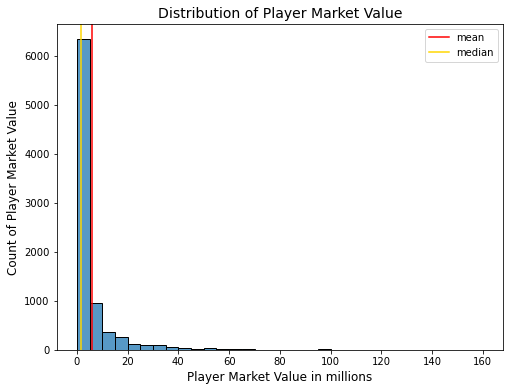

In [11]:
# Visualizing the distribution of market_val_amnt_mil
plt.figure(figsize=(8,6))

sns.histplot(data = market_stats, x = 'market_val_amnt_mil', binwidth = 5)
# add vertical lines to show the median and mean 
plt.axvline(market_stats['market_val_amnt_mil'].mean(), c='r', label='mean')
plt.axvline(market_stats['market_val_amnt_mil'].median(), c='gold', label='median')
plt.xlabel('Player Market Value in millions', fontsize=12)
plt.ylabel('Count of Player Market Value', fontsize=12)
plt.title("Distribution of Player Market Value", fontsize=14)
plt.legend()

plt.show()  

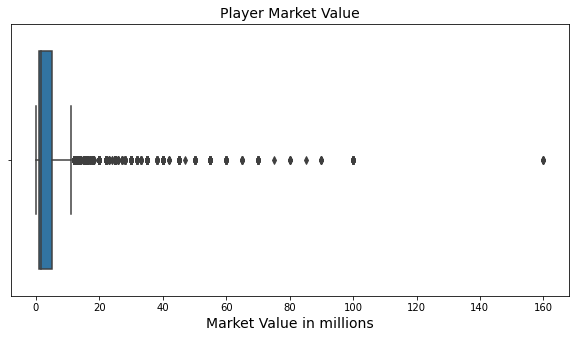

In [12]:
# Visualize Player Market value using box plot
plt.figure(figsize=(10,5))

sns.boxplot(data = market_stats, x = 'market_val_amnt_mil')
plt.title('Player Market Value', fontsize=14)
plt.xlabel('Market Value in millions', fontsize=14)

plt.show()

Looking at the above two plots, I can see that the distribution of the target variable is concentrated between 0 to 20 million with the most values centered around 10 million. There are a lot of outliers in the data. Let me find the number of outliers present in the column.

In [13]:
# Find the number of outliers in the column
MV_outliers = (market_stats['market_val_amnt_mil'] >= 18).sum()
MV_outliers

735

In [14]:
# Check the percentage of outliers
MV_outliers = MV_outliers/market_stats.shape[0]*100
MV_outliers

8.710594927707987

From above, I can see that there are around 8.7% of outliers present in the target variable. This might cause issue in modeling performance.

--------

## More Powerful Modeling

In order to perform modeling on the dataset I will first need to convert the categorical variables into numerical ones. There are 11 categorical variables in the dataset. First I will convert the `Position_group` variable.

**Converting the `Position_group` column**

This is one of my featured engineered variable that contains the player position on the field. Let me first look at the values returned by the column. 

In [15]:
# Look at the values of Position_group
final_df['Position_group'].value_counts()

Attacker      2925
Defender      2552
Midfielder    2469
Goalkeeper     492
Name: Position_group, dtype: int64

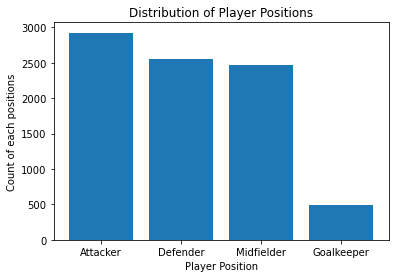

In [16]:
# Visualizing the column Player Position
plt.figure()
plt.bar(final_df['Position_group'].value_counts().index, 
        final_df['Position_group'].value_counts().values)
plt.title('Distribution of Player Positions')
plt.ylabel('Count of each positions')
plt.xlabel('Player Position')

plt.show()

The column only returns 4 values. So I can create dummy variables from this column using `pd.get_dummies` and include these variables in the dataframe. Then I will remove the old `Position_group` column from the dataframe.

In [17]:
# Create dummy variables for the column Position_group
dummy_pos_grp = pd.get_dummies(final_df['Position_group'])

# Concatenate the dummy variables into the dataframe
final_df = pd.concat([final_df, dummy_pos_grp], axis=1)

# Remove the old Position_group column 
final_df.drop('Position_group', axis=1, inplace=True)

In [18]:
# Look at the shape of the dataframe again
final_df.shape

(8438, 44)

Looking at the shape of the dataframe, I can see the number of columns has increased. 

**Converting the `Nationality` column**

Now I will take a look at the `Nationality` column. This is also my feature engineered variable that contains the information about the player nationality grouped by continents. 

In [19]:
# Look at the values of Nationality
final_df['Nationality'].value_counts()

EU       5766
AF       1217
SAM      1117
NTHAM     177
AS        133
AU         28
Name: Nationality, dtype: int64

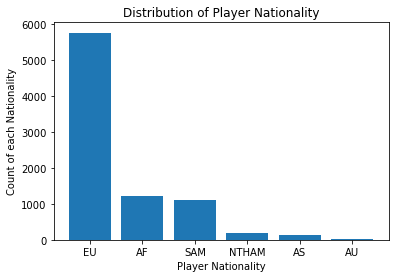

In [20]:
# Visualizing the column Nationality
plt.figure()
plt.bar(final_df['Nationality'].value_counts().index, 
        final_df['Nationality'].value_counts().values)
plt.title('Distribution of Player Nationality')
plt.ylabel('Count of each Nationality')
plt.xlabel('Player Nationality')

plt.show()

The column returns 6 values of the different continents the players belong to. I will convert this column into a binary one with players who are from Europe will be denoted as '1' and the players from the rest of the continents will be denoted by '0'. I will save this in a variable called `Player_Nationality` and then remove the old `Nationality` column from the dataframe.

In [21]:
# Converting Nationality into a binary column
final_df['Player_Nationality'] = np.where(final_df['Nationality'] == 'EU', 1, 0)

# Look at the values of the new column
final_df['Player_Nationality'].value_counts()

1    5766
0    2672
Name: Player_Nationality, dtype: int64

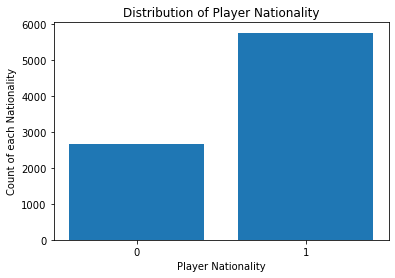

In [22]:
# Visualizing the column Player Nationality
plt.figure()
plt.bar(final_df['Player_Nationality'].value_counts().index, 
        final_df['Player_Nationality'].value_counts().values)
plt.title('Distribution of Player Nationality')
plt.ylabel('Count of each Nationality')
plt.xlabel('Player Nationality')
plt.xticks(list(range(0,2)))
plt.show()

Looking at the distribution of the `Player_Nationality`, I can see that there are more European players in the top 5 leagues in Europe compared to from other continents. This makes sense as all the 5 leagues are from Europe.

I will remove the old `Nationality` column from the dataframe and rename the new `Player_Nationality` column to `Nationality`. I will then check the dataframe again as a sanity check.

In [23]:
# Remove the old Nationality column 
final_df.drop('Nationality', axis=1, inplace=True)

In [24]:
# Rename the column Player_Nationality to Nationality
final_df.rename(columns={'Player_Nationality': 'Nationality'}, inplace=True)

In [25]:
# Check the dataframe
final_df.head()

Player          league  season window                team_name  \
0    Roger Johnson  Premier League    2011      s  Wolverhampton Wanderers   
1     Jamie O'Hara  Premier League    2011      s  Wolverhampton Wanderers   
2     Adam Hammill  Premier League    2011      s  Wolverhampton Wanderers   
3        Sam Vokes  Premier League    2011      s  Wolverhampton Wanderers   
4  Wayne Routledge  Premier League    2011      s             Swansea City   

  team_country  player_age player_nation player_pos       counter_team_name  \
0      England          28       England         CB         Birmingham City   
1      England          24       England         CM       Tottenham Hotspur   
2      England          24       England         RW        Middlesbrough FC   
3      England          22         Wales         CF  Brighton & Hove Albion   
4      England          26       England         LW        Newcastle United   

   ... xA/90  xG+xA/90  npxG/90  npxG+xA/90  buying_team  Attacker  Defender  \
0  ...   0.0       0.0      0.0         0.0            2         0         1   
1  ...   0.0       0.0      0.0         0.0            2         0         0   
2  ...   0.0       0.0      0.0         0.0            2         1         0   
3  ...   0.0       0.0      0.0         0.0            2         1         0   
4  ...   0.0       0.0      0.0         0.0            2         1         0   

   Goalkeeper  Midfielder  Nationality  
0           0           0            1  
1           0           1            1  
2           0           0            1  
3           0           0            1  
4           0           0            1  

[5 rows x 44 columns]

In [26]:
# Check the shape of the dataframe
final_df.shape

(8438, 44)

I will now remove the unnecessary columns from the dataframe as they don't add much value here. The `Player` and the `league` columns will also be removed as they are not necessary for the modeling.

In [27]:
# Drop the unnecessary columns
final_df.drop(columns = ['Player', 'league', 'window', 'team_name', 'team_country', 'player_nation', 'player_pos', 'transfer_fee_amnt_mil',
                         'counter_team_name', 'counter_team_country'], inplace = True)
# Check the dataframe
final_df.head()

season  player_age  market_val_amnt_mil    MP  Starts     Min  Min/90  \
0    2011          28                  1.5  38.0    38.0  3375.0    37.5   
1    2011          24                  1.5  14.0    13.0  1115.0    12.4   
2    2011          24                  0.4  10.0     7.0   536.0     6.0   
3    2011          22                  1.5   2.0     0.0    31.0     0.3   
4    2011          26                  1.5  17.0    10.0   996.0    11.1   

    Gls   Ast  NP_Gls  ...  xA/90  xG+xA/90  npxG/90  npxG+xA/90  buying_team  \
0  0.05  0.03    0.05  ...    0.0       0.0      0.0         0.0            2   
1  0.24  0.08    0.24  ...    0.0       0.0      0.0         0.0            2   
2  0.00  0.17    0.00  ...    0.0       0.0      0.0         0.0            2   
3  0.00  0.00    0.00  ...    0.0       0.0      0.0         0.0            2   
4  0.00  0.09    0.00  ...    0.0       0.0      0.0         0.0            2   

   Attacker  Defender  Goalkeeper  Midfielder  Nationality  
0         0         1           0           0            1  
1         0         0           0           1            1  
2         1         0           0           0            1  
3         1         0           0           0            1  
4         1         0           0           0            1  

[5 rows x 34 columns]

All the categorical columns have been converted to numerical values and the dataset is ready for modeling. I will take a look at all the columns.

In [28]:
# Look at the columns in the dataframe
final_df.columns

Index(['season', 'player_age', 'market_val_amnt_mil', 'MP', 'Starts', 'Min',
       'Min/90', 'Gls', 'Ast', 'NP_Gls', 'PK', 'PK_Att', 'CrdY', 'CrdR',
       'Gls/90', 'Ast/90', 'Gls+Ast/90', 'Gls-PK/90', 'Gls+Ast-PK/90', 'xG',
       'npxG', 'xA', 'npxG+xA', 'xG/90', 'xA/90', 'xG+xA/90', 'npxG/90',
       'npxG+xA/90', 'buying_team', 'Attacker', 'Defender', 'Goalkeeper',
       'Midfielder', 'Nationality'],
      dtype='object')

In [29]:
# Check the summary of the dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438 entries, 0 to 8437
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               8438 non-null   int64  
 1   player_age           8438 non-null   int64  
 2   market_val_amnt_mil  8438 non-null   float64
 3   MP                   8438 non-null   float64
 4   Starts               8438 non-null   float64
 5   Min                  8438 non-null   float64
 6   Min/90               8438 non-null   float64
 7   Gls                  8438 non-null   float64
 8   Ast                  8438 non-null   float64
 9   NP_Gls               8438 non-null   float64
 10  PK                   8438 non-null   float64
 11  PK_Att               8438 non-null   float64
 12  CrdY                 8438 non-null   float64
 13  CrdR                 8438 non-null   float64
 14  Gls/90               8438 non-null   float64
 15  Ast/90               8438 non-null   f

The final dataframe has 34 columns now with player information, their postion, the buying and selling teams, their Market Value in million and their on-field performance statistics. There are **8438 rows** and **34 columns** in the dataset.

In [30]:
# Take a look at the shape of the dataframe
print(f'There are {final_df.shape[0]} rows and {final_df.shape[1]} columns in the dataset.')

There are 8438 rows and 34 columns in the dataset.


Before I move on to modeling the data, I will instanstiate my independent and dependent variables. As mentioned previously, `market_val_amnt_mil` column which is the Player Market Value in million is the target variable and the dependent variable. The remaining columns in the dataframe are my independent variables.

In [31]:
# instantiating the independent and dependent variables 
X = final_df.drop(columns="market_val_amnt_mil")
y = final_df["market_val_amnt_mil"]

I will now visualize the independent variables versus the target variable to get a better understanding of the features.

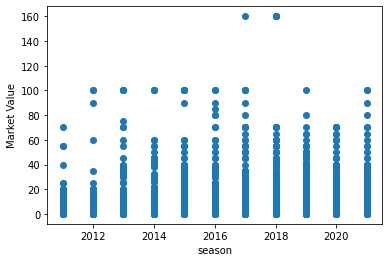

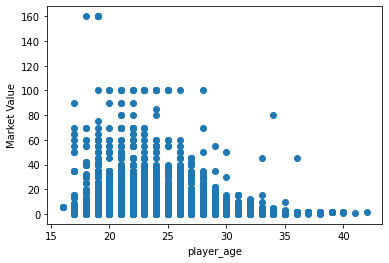

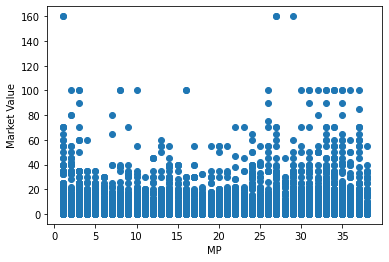

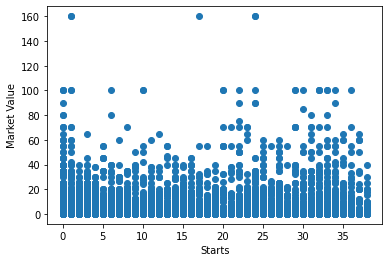

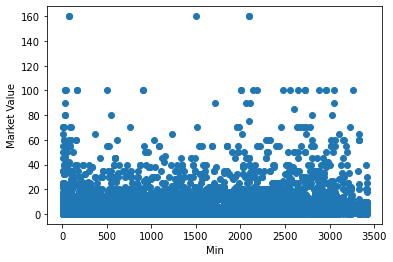

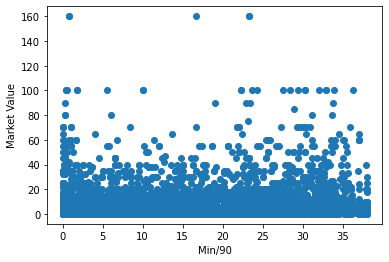

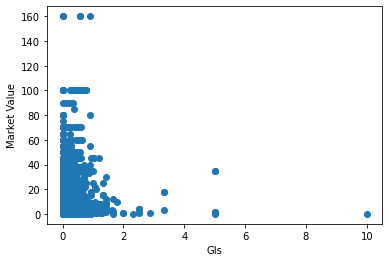

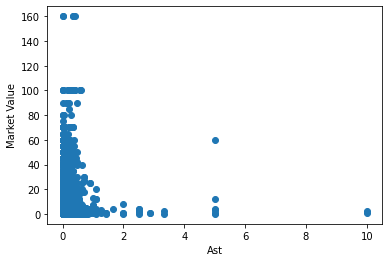

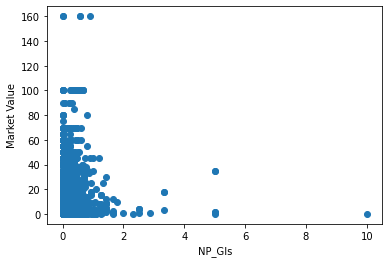

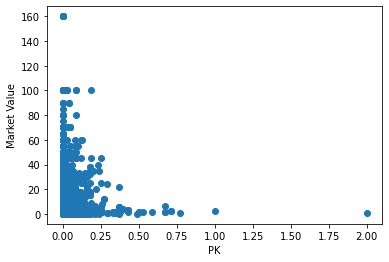

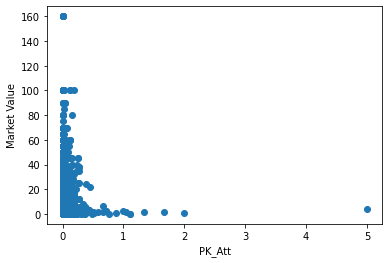

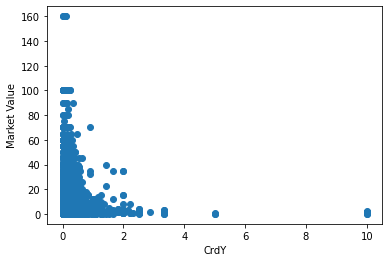

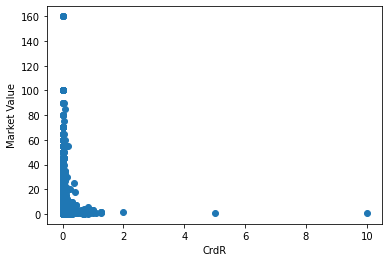

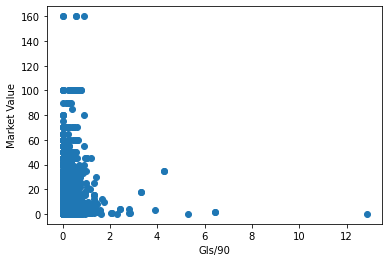

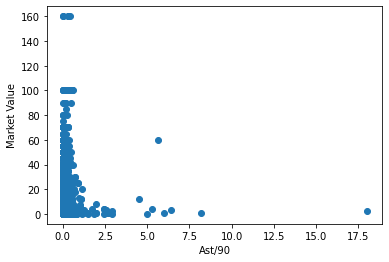

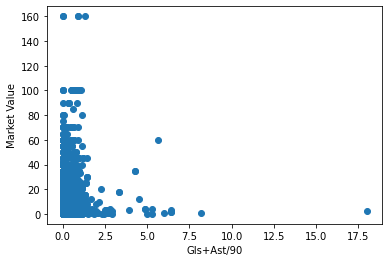

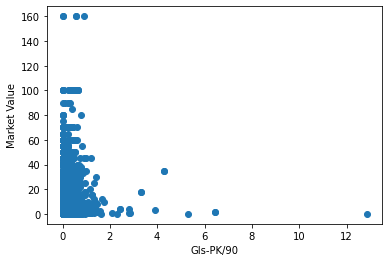

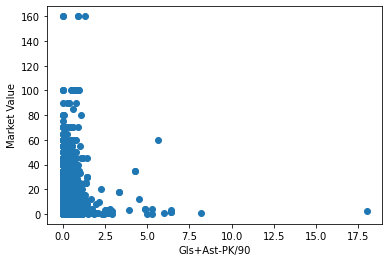

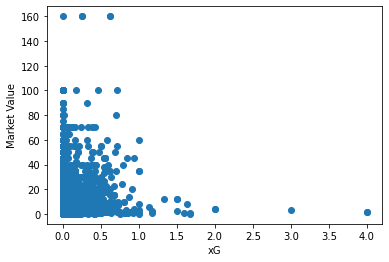

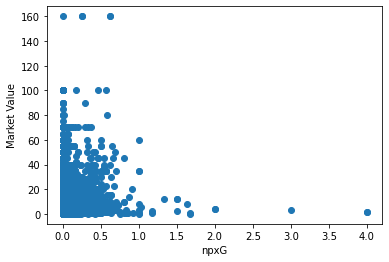

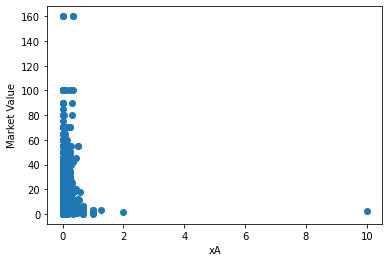

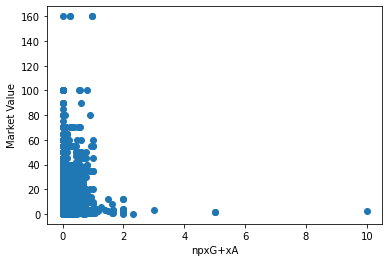

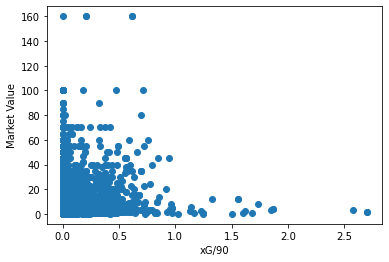

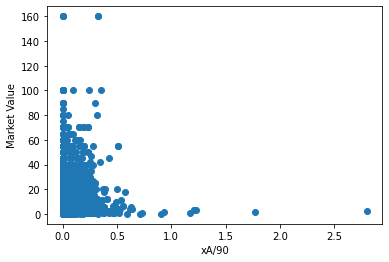

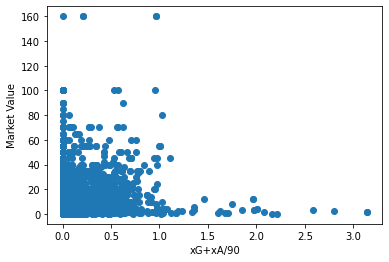

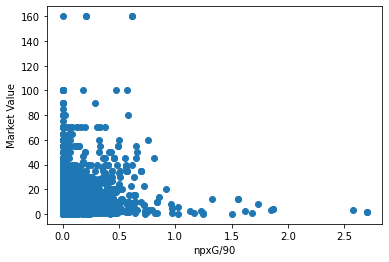

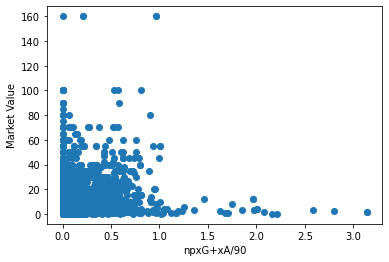

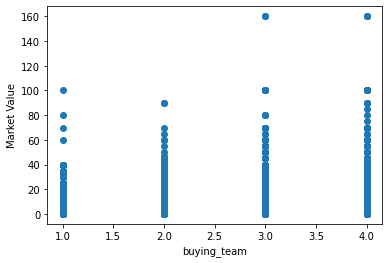

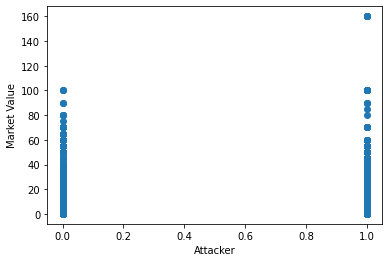

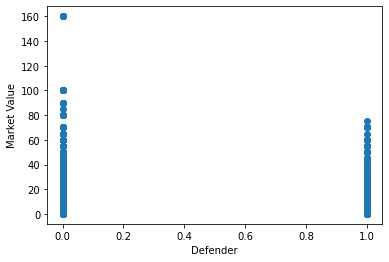

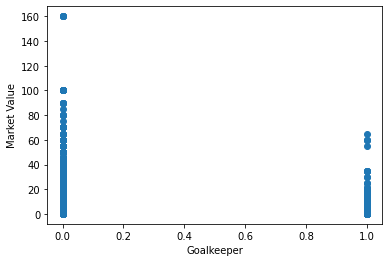

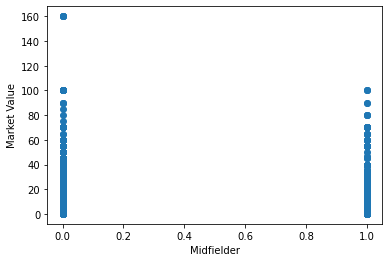

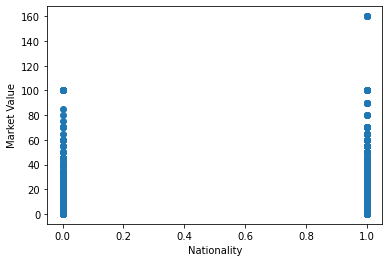

In [32]:
# visualize the independent variables Vs Market Value 

for col in X.columns: 
    plt.figure()
    plt.scatter(X[col], y)
    plt.ylabel('Market Value')
    plt.xlabel(col)
    
    plt.show();

I will split the data into train and test sets with 67%-33% split between them by using the `train_test_split` from the scikit-learn package.

In [33]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# Check the shape of each set
print(f"Shape of X_train set: {X_train.shape}")
print(f"Shape of X_test set: {X_test.shape}")
print(f"Shape of y_train set: {y_train.shape}")
print(f"Shape of y_test set: {y_test.shape}")

Shape of X_train set: (5653, 33)
Shape of X_test set: (2785, 33)
Shape of y_train set: (5653,)
Shape of y_test set: (2785,)


The train set has 5653 rows and the test set has 2785 rows. 

**Baseline model**

I will first run a Linear Regression model on the data and create a baseline model. This will be a measuring matrix and will help me in comparing and finding the best model. For model evaluation, R-squared metrics has been used as a relative measure of goodness of fit to measure the model accuracy and the Mean Absolute Errors is used to calculate the average absolute value of errors between the true Market Value and the predicted Market Value to measure the model performance.

I will import the LinearRegression packages and then instantiate and fit my data.

In [35]:
# Import the required package
from sklearn.linear_model import LinearRegression

# Run Linear Regression on the unscaled data first as a baseline model
# 1. Instantiate
baseline_model = LinearRegression()
# 2. Fit
baseline_model.fit(X_train, y_train)

LinearRegression()

In [36]:
baseline_train = round(baseline_model.score(X_train, y_train), 2)
baseline_test = round(baseline_model.score(X_test, y_test), 2)
# Print the R^2
print(f'Baseline model train R^2: {round((baseline_train),2)}')
print(f'Baseline model test R^2: {round((baseline_test),2)}')

Baseline model train R^2: 0.2
Baseline model test R^2: 0.2


In [37]:
# Save the baseline_test R^2 into a new variable for later use 
baseline_r2 = baseline_test
baseline_r2

0.2

The R<sup>2</sup> score on the test set is approximately 0.20 or 20% which is the same as the score on the train set, ~20%. This is not so bad since there is no overfitting in the data. I will now visualize the model prediction versus the actual value in order to compare how the model is performing.

In [39]:
# Import packages
import statsmodels.api as sm
import scipy.stats as stats

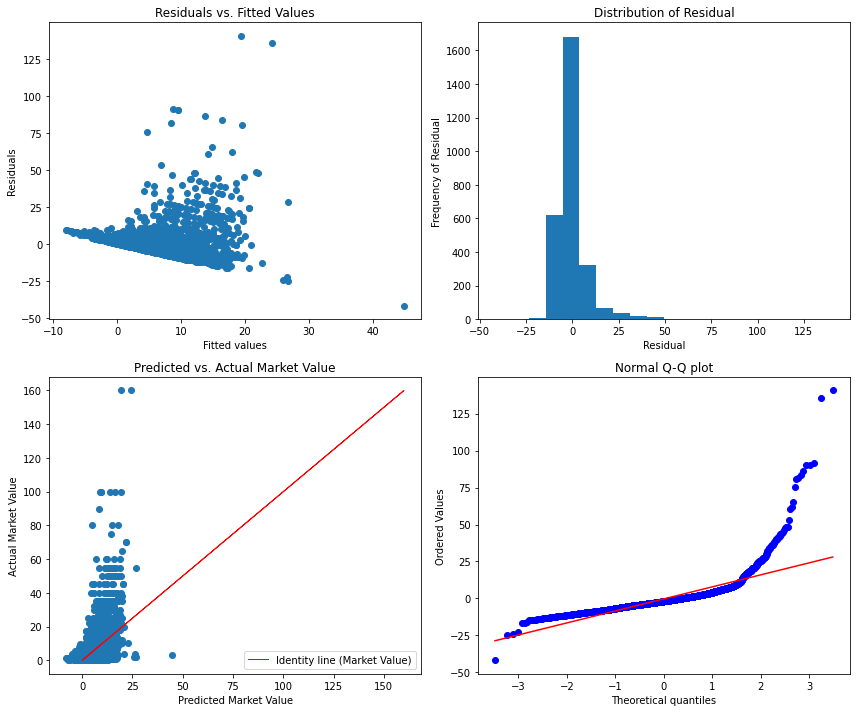

In [40]:
# Find the residuals and prediction values
baseline_model_predict = baseline_model.predict(X_test)
baseline_model_resid = y_test - baseline_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(baseline_model_predict, baseline_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(baseline_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(baseline_model_predict, y_test)
plt.plot(y_test, y_test, color='red',linewidth=1, label='Identity line (Market Value)')
plt.title('Predicted vs. Actual Market Value')
plt.xlabel('Predicted Market Value')
plt.ylabel('Actual Market Value')
plt.legend()

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(baseline_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals are not very normally distributed and looking at the prediction versus actual values I can tell that the model is not doing a good job at predicting the market variables. The Q-Q plot generated a probability plot of the sample data against the quantiles of a the theoretical distribution. The plot does not show much linearity in the data. I will now calculate the mean cross_val_scores with RMSE, ‘neg_root_mean_squared_error’ as the scoring metric. Ideally, we would want the RMSE value to be as close to 0 as possible.

In [48]:
# Import the packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Calculate the RMSE
baseline_cross_val_train = cross_val_score(baseline_model, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
baseline_cross_val_test = cross_val_score(baseline_model, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)
# Find the train Results
baseline_cv_train_mean = round(-(baseline_cross_val_train.mean()),2)
# Find the test Results
baseline_cv_test_mean = round(-(baseline_cross_val_test.mean()),2)
print(f'RMSE on train: {baseline_cv_train_mean}')
print(f'RMSE on test: {baseline_cv_test_mean}')

RMSE on train: 10.59
RMSE on test: 10.12


I will also calculate the Mean Absolute error which is the average absolute value of the errors between the true value and the predicted value. Similar to the RMSE, we would want the MAE value to be as close to 0 as possible.

In [49]:
# Calculate the Mean Absolute error
baseline_model_mae = -np.mean(cross_val_score(baseline_model, X_train, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error'))
baseline_model_mae

5.862641158070124

Both the RMSE and MAE values are high for the baseline model. I can interpret this as the model is capable of predicting the Market Value of a player within 5.8 million on average. It has an error of around 10.12 million (RMSE). I will now scale the data using `StandardScaler` from scikit-learn package.

In [50]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

# Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

I will run a Linear Regression model on the scaled data to see if there is an improvement in the performance.

In [51]:
# Run Linear Regression on the scaled data
# 1. Instantiate
lr_model = LinearRegression()
# 2. Fit
lr_model.fit(X_train_scaled, y_train)
# 3. Score model
print(f'Score on scaled train set: {round(lr_model.score(X_train_scaled, y_train),2)}')
print(f'Score on scaled test set: {round(lr_model.score(X_test_scaled, y_test),2)}')

Score on scaled train set: 0.2
Score on scaled test set: 0.2


The R<sup>2</sup> remained the same on the scaled data. There was no improvement in the performance. I will now apply an ensemble model on the scaled data to see how it is performing. 

**Random Forest Regressor**

In [52]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Run RandomForest Regressor
# Instantiate
rf_model = RandomForestRegressor()
# Fit
rf_model.fit(X_train_scaled, y_train)
# Pint R^2
print(f'Score on scaled train set: {round(rf_model.score(X_train_scaled, y_train),2)}')
print(f'Score on scaled test set: {round(rf_model.score(X_test_scaled, y_test),2)}')

Score on scaled train set: 0.91
Score on scaled test set: 0.3


The R^2 has jumped 10%. But there is some serious overfitting present on the data. Let me check the residuals and the predictions.

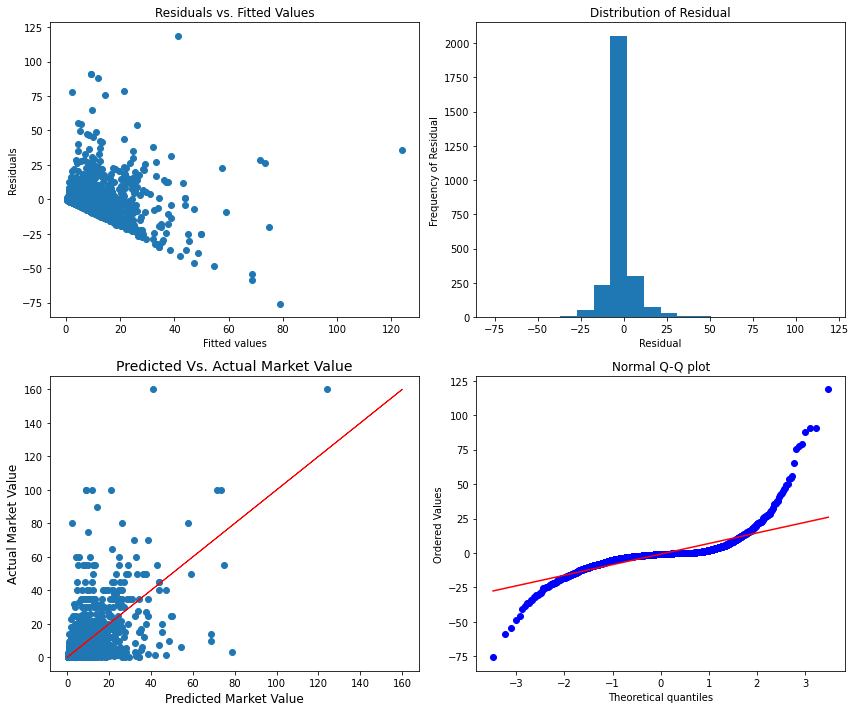

In [125]:
# Find the residuals and prediction values
rf_model_predict = rf_model.predict(X_test_scaled)
rf_model_resid = y_test - rf_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(rf_model_predict, rf_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(rf_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(rf_model_predict, y_test)
plt.plot(y_test, y_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Market Value', fontsize=14)
plt.xlabel('Predicted Market Value', fontsize=12)
plt.ylabel('Actual Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(rf_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The model is under predicting the Market values. Let me check the RMSE and the mean absolute errors to see the performance. 

In [54]:
# Calculate the Mean Absolute error
rf_model_mae = -np.mean(cross_val_score(rf_model, X_train_scaled, y_train, 
                                              cv=5, scoring='neg_mean_absolute_error'))
rf_model_mae

4.837513625396676

In [55]:
# Calculate the RMSE
rf_model_cross_val_train = cross_val_score(rf_model, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
rf_model_cross_val_test = cross_val_score(rf_model, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)
# Find the train Results
rf_model_cv_train_mean = round(-(rf_model_cross_val_train.mean()),2)
# Find the test Results
rf_model_cv_test_mean = round(-(rf_model_cross_val_test.mean()),2)
print(f'RMSE on train: {rf_model_cv_train_mean}')
print(f'RMSE on test: {rf_model_cv_test_mean}')

RMSE on train: 9.62
RMSE on test: 9.46


Both the RMSE and the MAE has decreased but they are still high. I will look at the top predictors for this model.

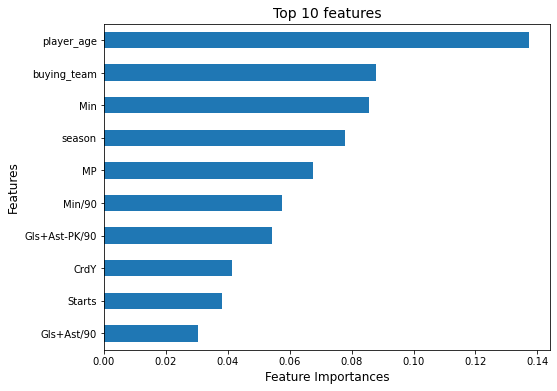

In [56]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))
plt.title('Top 10 features', fontsize=14)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Extract the top 10 features
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

plt.show()

The year, teams, and the goals columns have a higher correlation compared to the other columns. The player age, positions, and the number of yellow cards and red cards received by the players are negatively correlated to the Market Value. The age column being negatively correlated makes sense because as the players get older, their stamina decreases, their performance deteriorates and since they can't perform well the demand to have them play in a club decreases along with their Market Value. Moreover, most players retire after the age of 38.

One of the reasons for the overfitting is beacause the data is very imbalanced and skewed. I'll try transforming the target variable in order to help with the overfitting.

### Transforming the target variable by taking the log of `market_val_amnt_mil`

I will transform the target variable by taking the logarithm of the Market Value in an attempt to linearize the data. This will help me eliminating any negative value predictions as well and also help address the issue of overfitting and skewness.

In [57]:
# Taking log of Market Value column
final_df['log_MV'] = np.log(final_df['market_val_amnt_mil'] + 1)
# Check the dataframe
final_df.head()

season  player_age  market_val_amnt_mil    MP  Starts     Min  Min/90  \
0    2011          28                  1.5  38.0    38.0  3375.0    37.5   
1    2011          24                  1.5  14.0    13.0  1115.0    12.4   
2    2011          24                  0.4  10.0     7.0   536.0     6.0   
3    2011          22                  1.5   2.0     0.0    31.0     0.3   
4    2011          26                  1.5  17.0    10.0   996.0    11.1   

    Gls   Ast  NP_Gls  ...  xG+xA/90  npxG/90  npxG+xA/90  buying_team  \
0  0.05  0.03    0.05  ...       0.0      0.0         0.0            2   
1  0.24  0.08    0.24  ...       0.0      0.0         0.0            2   
2  0.00  0.17    0.00  ...       0.0      0.0         0.0            2   
3  0.00  0.00    0.00  ...       0.0      0.0         0.0            2   
4  0.00  0.09    0.00  ...       0.0      0.0         0.0            2   

   Attacker  Defender  Goalkeeper  Midfielder  Nationality    log_MV  
0         0         1           0           0            1  0.916291  
1         0         0           0           1            1  0.916291  
2         1         0           0           0            1  0.336472  
3         1         0           0           0            1  0.916291  
4         1         0           0           0            1  0.916291  

[5 rows x 35 columns]

The target variable has been transformed into log values. I will take a look at this column.

In [58]:
# Find the basic statistics details about the column
final_df['log_MV'].describe()

count    8438.000000
mean        1.315869
std         0.960812
min         0.009950
25%         0.641854
50%         0.916291
75%         1.791759
max         5.081404
Name: log_MV, dtype: float64

Looking at the column I can see that the average is around 1.31 and the maximum value is around 5.08. Let me look at the histograms and boxplots of the Market Value before and after the transformation to see the difference.

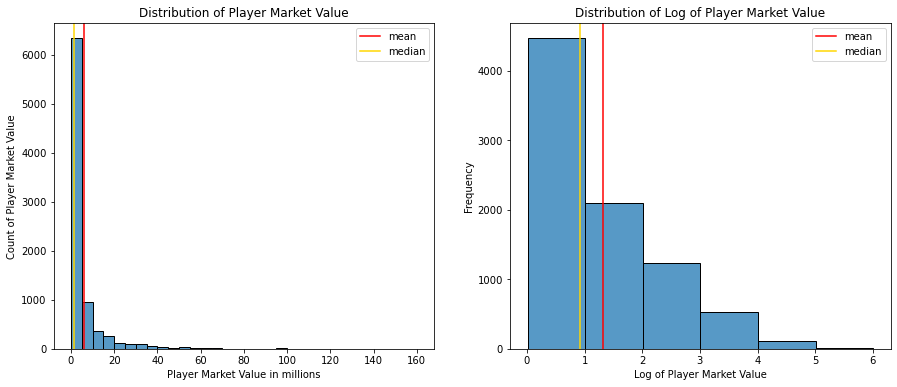

In [59]:
# Visualizing both variables
plt.subplots(1, 2, figsize=(15, 6))

# Visualizing the distribution of market_val_amnt_mil
plt.subplot(1, 2, 1)
sns.histplot(data = final_df, x = 'market_val_amnt_mil', binwidth = 5)
# add vertical lines to show the median and mean
plt.axvline(final_df['market_val_amnt_mil'].mean(), c='r', label='mean')
plt.axvline(final_df['market_val_amnt_mil'].median(), c='gold', label='median')
plt.xlabel('Player Market Value in millions')
plt.ylabel('Count of Player Market Value')
plt.title("Distribution of Player Market Value")
plt.legend()

# Visualizing the distribution of log_MV
plt.subplot(1, 2, 2)
sns.histplot(data = final_df, x = 'log_MV', binwidth = 1)
# add vertical lines to show the median and mean
plt.axvline(final_df['log_MV'].mean(), c='r', label='mean')
plt.axvline(final_df['log_MV'].median(), c='gold', label='median')
plt.xlabel('Log of Player Market Value')
plt.ylabel('Frequency')
plt.title("Distribution of Log of Player Market Value")
plt.legend()

plt.show() 

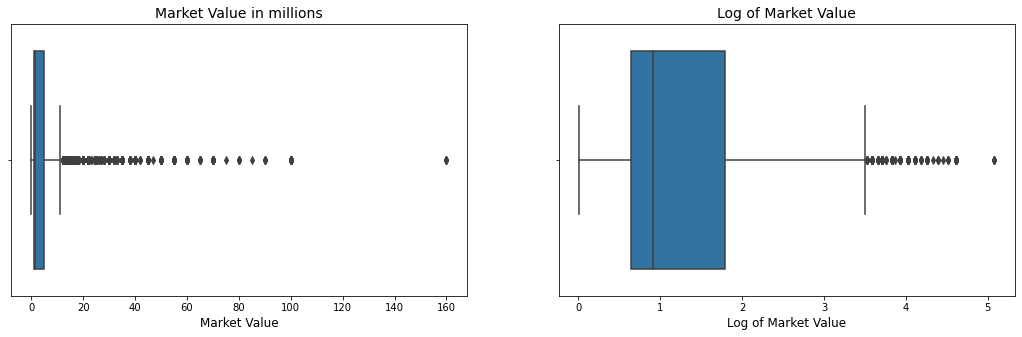

In [60]:
# Visualizing using Box plots
plt.subplots(1, 2, figsize=(18, 5))

# Box plot of Market Value in millions
plt.subplot(1, 2, 1)
sns.boxplot(data=final_df, x = 'market_val_amnt_mil')
plt.title('Market Value in millions', fontsize=14)
plt.xlabel('Market Value', fontsize=12)

# Box plot of Log of Market Value
plt.subplot(1, 2, 2)
sns.boxplot(data=final_df, x = 'log_MV')
plt.title('Log of Market Value', fontsize=14)
plt.xlabel('Log of Market Value', fontsize=12)

plt.show()

Looking at the histograms and the box plots, I can tell that the target variable looks much better than before. The data is less skewed than before and the trend also looks more consistent now. I will move forward to modeling to see the difference in the performance.

I will instanstiate my independent and dependent variables again with the log of Market Value being the target variable now.

In [61]:
# Instantiating our independent and dependent variables 
X_orig = final_df.drop(columns=["market_val_amnt_mil", "log_MV"])
y_orig_log = final_df["log_MV"]

Let me visualize the independent variables versus the target variable to get a better understanding of the features.

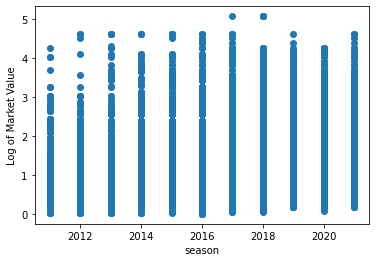

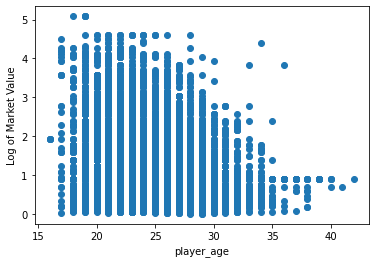

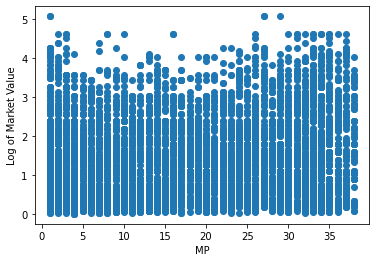

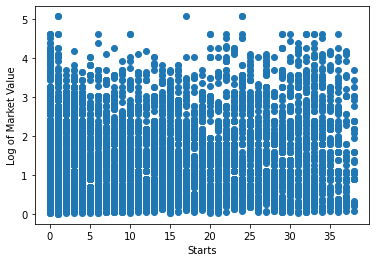

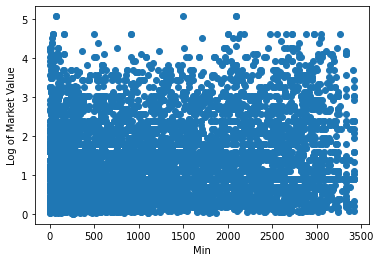

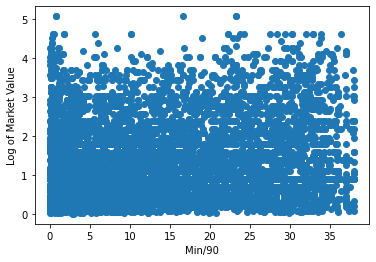

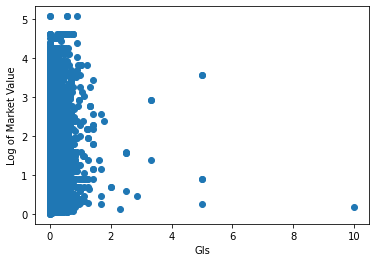

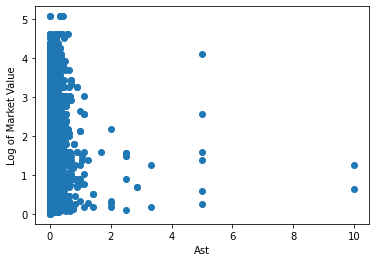

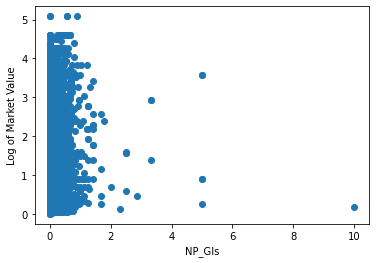

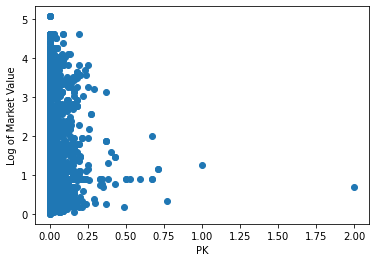

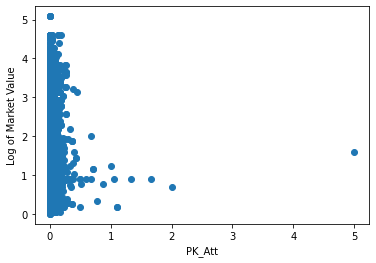

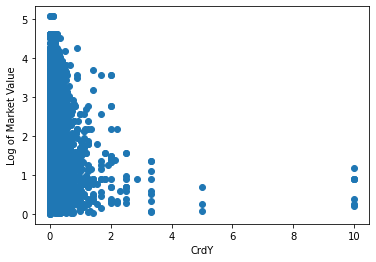

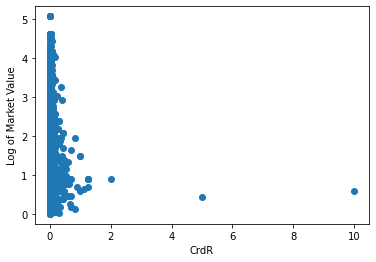

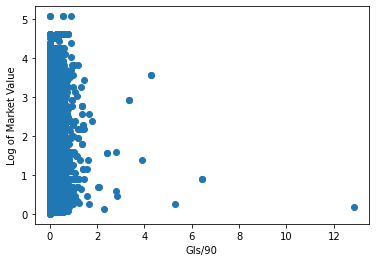

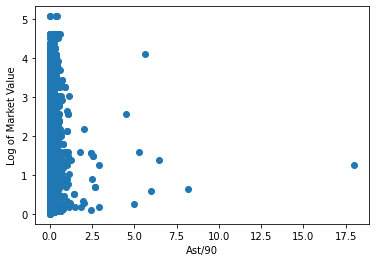

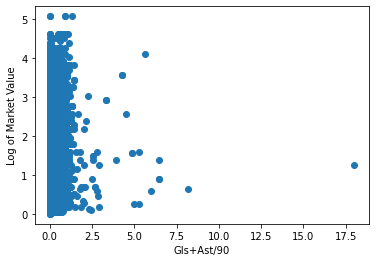

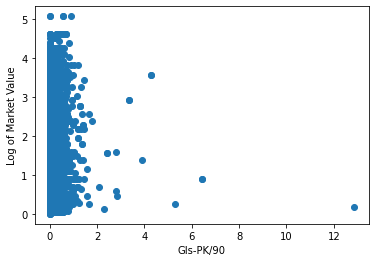

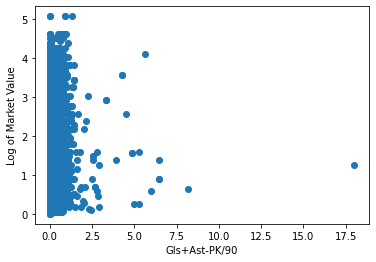

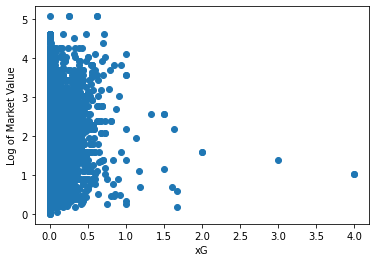

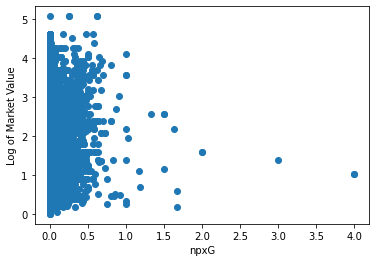

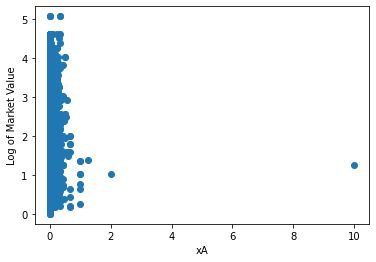

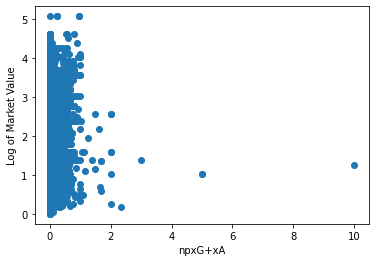

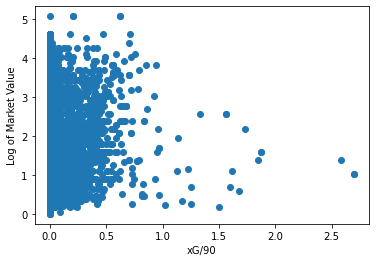

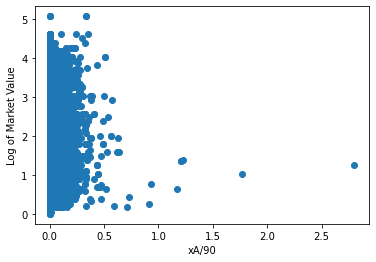

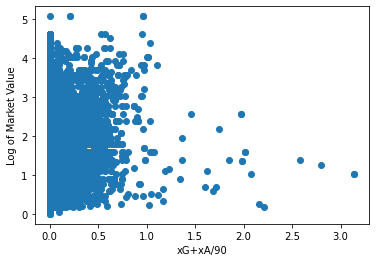

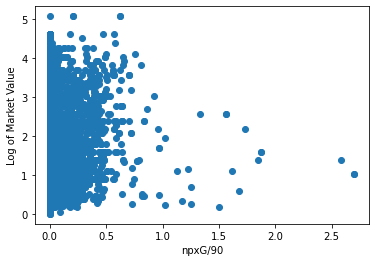

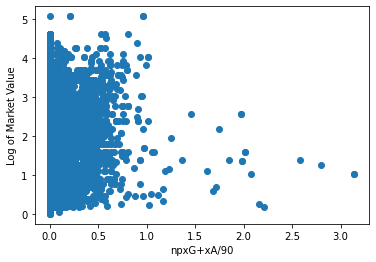

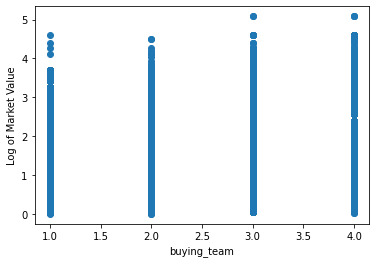

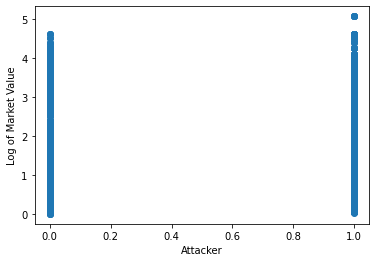

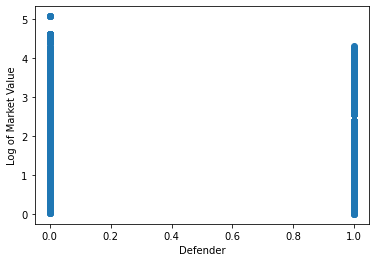

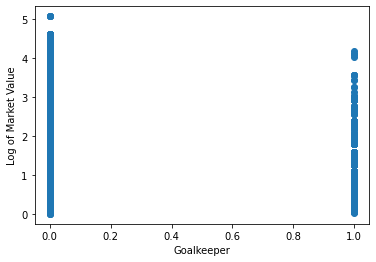

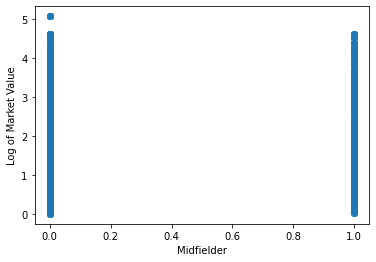

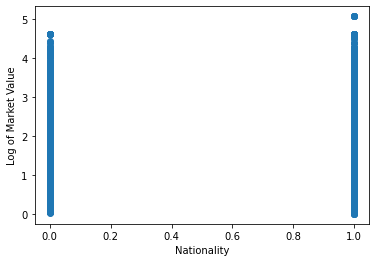

In [62]:
# visualize the independent variables Vs Log of Market Value 

for col in X_orig.columns: 
    plt.figure()
    plt.scatter(X_orig[col], y_orig_log)
    plt.ylabel('Log of Market Value')
    plt.xlabel(col)
    
    plt.show();

I will split the data into train and test sets with 67%-33% split between them like I did previously.

In [63]:
# Splitting the data into new train and test sets
X_orig_train, X_orig_test, y_orig_log_train, y_orig_log_test = train_test_split(X_orig, y_orig_log, 
                                                                                test_size=0.33, random_state=42)

I will check the shape of each set as a sanity check.

In [64]:
# Check the shape of each set
print(f"Shape of X_orig_train set: {X_orig_train.shape}")
print(f"Shape of X_orig_test set: {X_orig_test.shape}")
print(f"Shape of y_orig_log_train set: {y_orig_log_train.shape}")
print(f"Shape of y_orig_log_test set: {y_orig_log_test.shape}")

Shape of X_orig_train set: (5653, 33)
Shape of X_orig_test set: (2785, 33)
Shape of y_orig_log_train set: (5653,)
Shape of y_orig_log_test set: (2785,)


I will first run a Linear Regression model to see the model performance.

In [65]:
# Apply Linear Regression model to unscaled data
# Instantiate the model
lr_model_unscaled = LinearRegression()
# Fit
lr_model_unscaled.fit(X_orig_train, y_orig_log_train)
# Score model
print(f'Score on train set for unscaled data: {round(lr_model_unscaled.score(X_orig_train, y_orig_log_train),2)}')
print(f'Score on test set for unscaled data: {round(lr_model_unscaled.score(X_orig_test, y_orig_log_test),2)}')

Score on train set for unscaled data: 0.34
Score on test set for unscaled data: 0.33


The R2 has gone up by 13% which is good. There is a little underfitting present in the data. I will scale the data using `StandardScaler` from scikit-learn package and fit the scaled data into a Linear Regression model in order to see if there is an improvement in the model performance.

In [66]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

# Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_orig_train)
X_orig_train_scaled = scaler.transform(X_orig_train)
X_orig_test_scaled = scaler.transform(X_orig_test)

In [67]:
# Apply Linear Regression model to scaled data
# Instantiate the model
lr_model_2 = LinearRegression()
# Fit
lr_model_2.fit(X_orig_train_scaled, y_orig_log_train)
# Score model
print(f'Score on train set: {round(lr_model_2.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'Score on test set: {round(lr_model_2.score(X_orig_test_scaled, y_orig_log_test),2)}')

Score on train set: 0.34
Score on test set: 0.33


The score remained the same for the scaled data. Let me check the residuals and predictions.

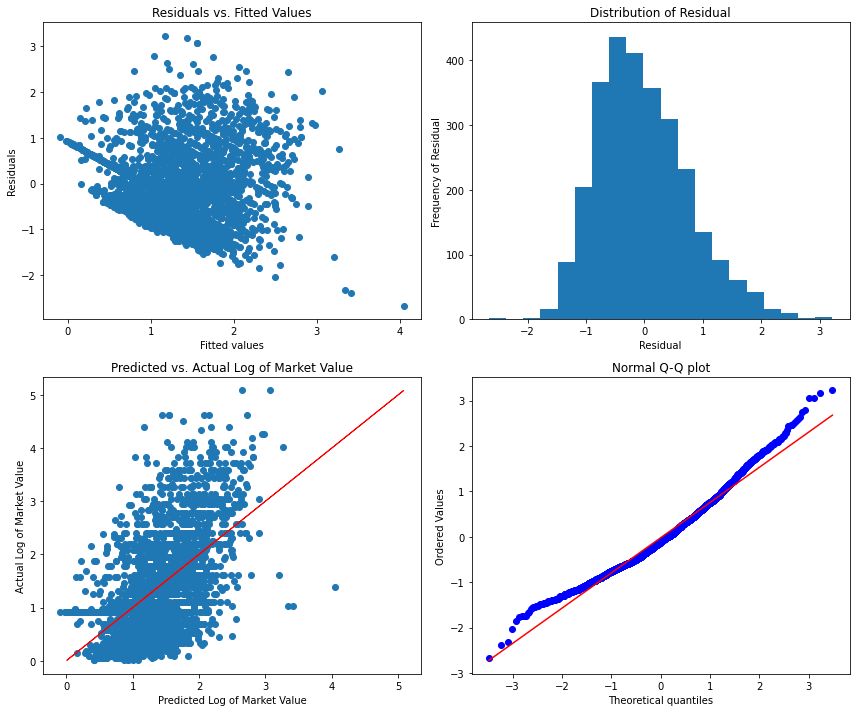

In [124]:
# Find the residuals and predictions
lr_model_2_predict = lr_model_2.predict(X_orig_test_scaled)
lr_model_2_resid = y_orig_log_test - lr_model_2_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lr_model_2_predict, lr_model_2_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lr_model_2_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lr_model_2_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lr_model_2_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The Q-Q plot looks better. It is pretty linear, representing a good model fit on the data. So the transformation worked. I will now try applying the ensemble model Random Forest and also some Boosting models as well.

### Random Forest Regressor

I will first fit a Random Forest Regressor with default hyperparameters on the scaled data to see the performance.

In [69]:
# Run RandomForest Regressor with default parameter
# Instantiate
RF_model = RandomForestRegressor()
# Fit
RF_model.fit(X_orig_train_scaled, y_orig_log_train)
# Score
print(f'R^2 on  train set: {round(RF_model.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test test set: {round(RF_model.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.92
R^2 on test test set: 0.45


The R^2 has increased by 12%. There is still overfitting present in the data. I will take a look at the residuals and the predictions.

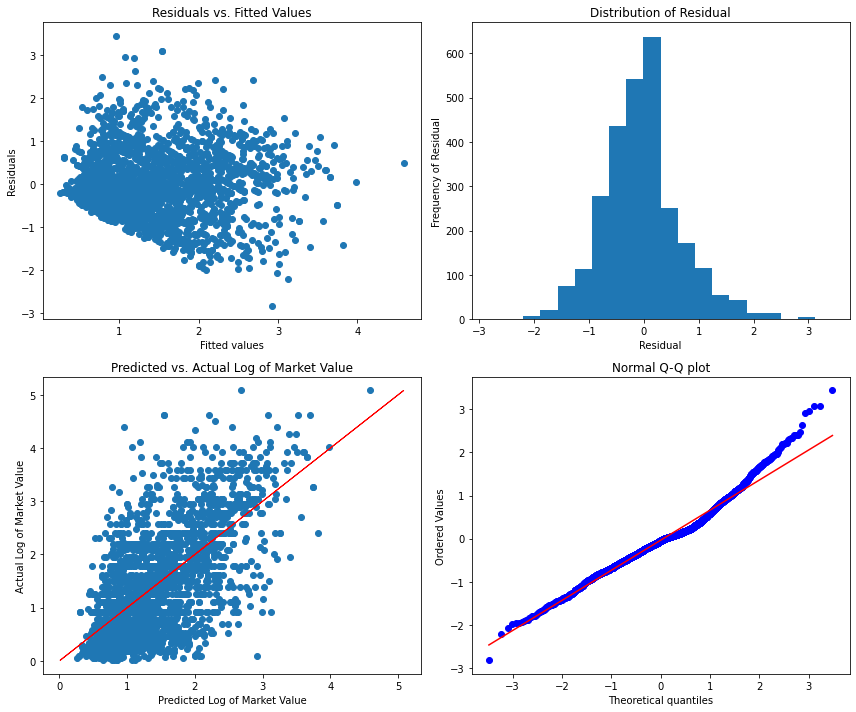

In [123]:
# Find the residuals and predictions
RF_model_predict = RF_model.predict(X_orig_test_scaled)
RF_model_resid = y_orig_log_test - RF_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(RF_model_predict, RF_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(RF_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(RF_model_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted vs. Actual Log of Market Value')
plt.xlabel('Predicted Log of Market Value')
plt.ylabel('Actual Log of Market Value')

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(RF_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The R^2 is quite good compared to the other models and the residuals are more normally distributed. Thw Q-Q plot also shows linearity. I will now check the MAE and RMSE to check the errors.

In [71]:
# Print the MAE
mean_RF_model_mae = -np.mean(cross_val_score(RF_model, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_RF_model_mae

0.5337906685437777

In [72]:
# Calculate the RMSE
RF_model_cross_val_train = cross_val_score(RF_model, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
RF_model_cross_val_test = cross_val_score(RF_model, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)
# Find the train Results
RF_model_cv_train_mean = round(-(RF_model_cross_val_train.mean()),2)
# Find the test Results
RF_model_cv_test_mean = round(-(RF_model_cross_val_test.mean()),2)
print(f'RMSE on train: {RF_model_cv_train_mean}')
print(f'RMSE on test: {RF_model_cv_test_mean}')

RMSE on train: 0.72
RMSE on test: 0.72


Both the RMSE and MAE are much lower than the previous models. I will now tune the hyperparameters to find the best Random Forest Regressor model using gridsearch. I will be using 5 folds for the cross validation.

In [59]:
# Hyperparameter tuning to improve model performance using gridsearch

# Set parameter grid
RF_params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [60]:
# Import gridsearch and pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Fit gridsearch
RF_grid_search = GridSearchCV(estimator = RF_model, param_grid = RF_params, 
                          cv = 5, n_jobs = -1, verbose = 1)

In [61]:
# Fit and find the best model 
RF_grid_search.fit(X_orig_train_scaled, y_orig_log_train)             

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=1)

In [62]:
# Find the best parameters
RF_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [64]:
# Print the R^2
print(f'R^2 on train set: {round(RF_grid_search.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test test set: {round(RF_grid_search.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on train set: 0.65
R^2 on test test set: 0.41


I have the hyperparameters so now I am going to instantiate and fit the scaled data into the Random Forest with optimized hyperparameter and check it's performance.

In [73]:
# Run RandomForest Regressor with the best hyperparameters
# Instantiate
RF_model_1 = RandomForestRegressor(bootstrap=True, 
                                 max_depth=90,
                                 max_features=3,
                                 min_samples_leaf=3,
                                 min_samples_split=8,
                                 n_estimators=200)
# Fit
RF_model_1.fit(X_orig_train_scaled, y_orig_log_train)
# Score
print(f'R^2 on train set: {round(RF_model_1.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test test set: {round(RF_model_1.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on train set: 0.65
R^2 on test test set: 0.41


The R^2 is 4% lower than the previous model with the default hyperparameter and the overfitting is still present. I will look at the residuals and predictions.

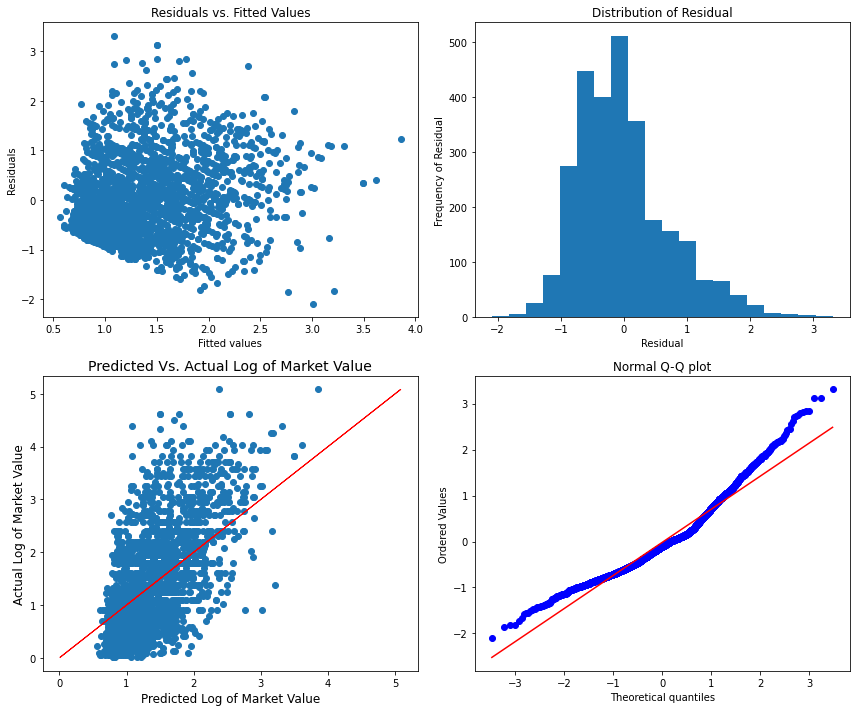

In [122]:
# Find the residuals and predictions
RF_model_1_predict = RF_model_1.predict(X_orig_test_scaled)
RF_model_1_resid = y_orig_log_test - RF_model_1_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(RF_model_1_predict, RF_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(RF_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(RF_model_1_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(RF_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals and predictions on the previous model was definitely better than this model. I will see if the errors have decreased.

In [123]:
# Print the MAE
mean_RF_model_1_mae = -np.mean(cross_val_score(RF_model_1, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_RF_model_1_mae

0.5706584323339046

In [124]:
# Calculate the RMSE
RF_model_1_cross_val_train = cross_val_score(RF_model_1, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
RF_model_1_cross_val_test = cross_val_score(RF_model_1, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)
# Find the train Results
RF_model_1_cv_train_mean = round(-(RF_model_1_cross_val_train.mean()),2)
# Find the test Results
RF_model_1_cv_test_mean = round(-(RF_model_1_cross_val_test.mean()),2)
print(f'RMSE on train: {RF_model_1_cv_train_mean}')
print(f'RMSE on test: {RF_model_1_cv_test_mean}')

RMSE on train: 0.76
RMSE on test: 0.76


Both the RMSE and MAE are higher than the previous model. I will fit another Random Forest with the hyperparameters.

In [75]:
# Run RandomForest Regressor again with hyperparameters
# Instantiate
RF_model_2 = RandomForestRegressor(bootstrap=True, 
                                 max_depth=110,
                                 max_features=6,
                                 min_samples_leaf=3,
                                 min_samples_split=8,
                                 n_estimators=300)
# Fit
RF_model_2.fit(X_orig_train_scaled, y_orig_log_train)
# Score
print(f'R^2 on  train set: {round(RF_model_2.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test set: {round(RF_model_2.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.73
R^2 on test set: 0.44


The R^2 is better than the previous model and the overfitting is also less than the previous model. Let me check the residuals and predictions.

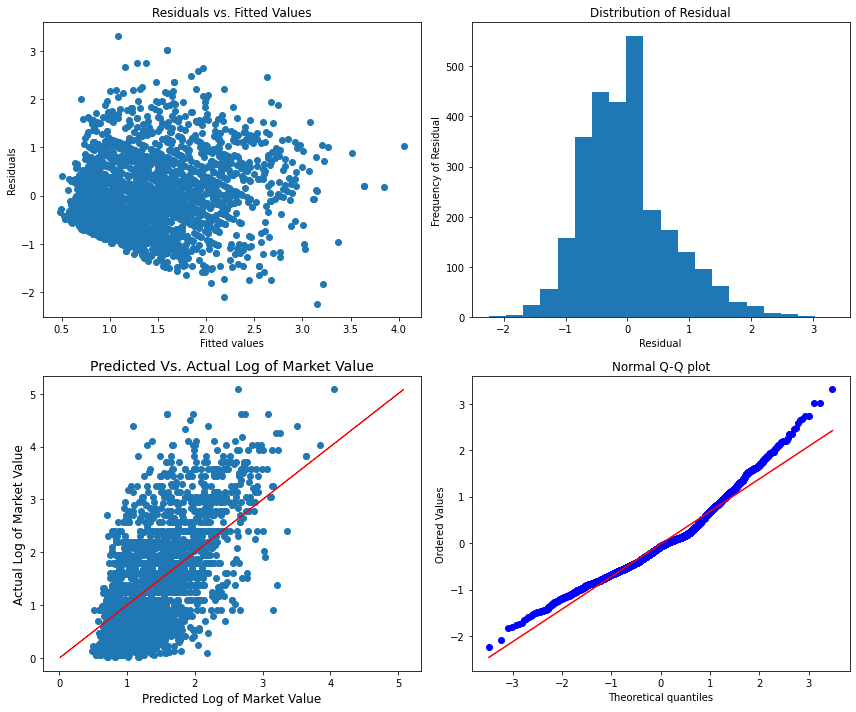

In [121]:
# Find the residuals and predictions
RF_model_2_predict = RF_model_2.predict(X_orig_test_scaled)
RF_model_2_resid = y_orig_log_test - RF_model_2_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(RF_model_2_predict, RF_model_2_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(RF_model_2_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(RF_model_2_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(RF_model_2_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residulas and the predictions are better in this model. Let me check the MAE and RMSE.

In [77]:
# Print the MAE
mean_RF_model_2_mae = -np.mean(cross_val_score(RF_model_2, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
mean_RF_model_2_mae

0.5504278659617367

In [78]:
# Calculate the RMSE
RF_model_2_cross_val_train = cross_val_score(RF_model_2, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
RF_model_2_cross_val_test = cross_val_score(RF_model_2, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)
# Find the train Results
RF_model_2_cv_train_mean = round(-(RF_model_2_cross_val_train.mean()),2)
# Find the test Results
RF_model_2_cv_test_mean = round(-(RF_model_2_cross_val_test.mean()),2)
print(f'RMSE on train: {RF_model_2_cv_train_mean}')
print(f'RMSE on test: {RF_model_2_cv_test_mean}')

RMSE on train: 0.73
RMSE on test: 0.74


The RMSE and the MAE are almost similar than the previous model. I will try to find the top predictors from this model using the feature importances.

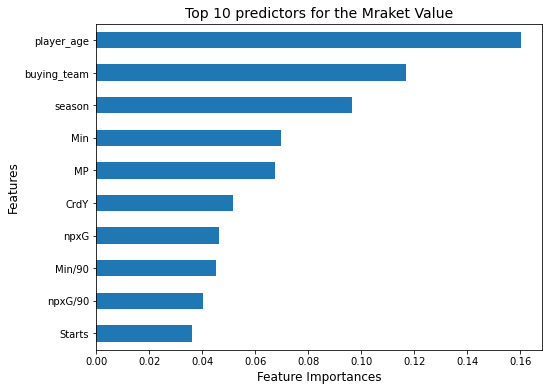

In [79]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))
plt.title('Top 10 predictors for the Mraket Value', fontsize=14)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Extract the top 10 features
feat_importances = pd.Series(RF_model.feature_importances_, index = X_orig_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

plt.show()

The player age and the number of yellow cards received being in the top 10 predictors does not make sense. I will move on to perform some boosting on the data. First I will apply an Ada Boost Regressor on the data.

### AdaBoost Regressor

I will first fit a AdaBoost Regressor with default hyperparameters on the scaled data to see the performance.

In [80]:
# Import AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# Run AdaBoost Regressor with default parameter
# Instantiate
AB_model = AdaBoostRegressor()
# Fit model
AB_model.fit(X_orig_train_scaled, y_orig_log_train)
# Print Score
print(f'R^2 on  train set: {round(AB_model.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test set: {round(AB_model.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.24
R^2 on test set: 0.2


The R^2 is quite low similar to the baseline model. Let me check the residuals and the predictions.

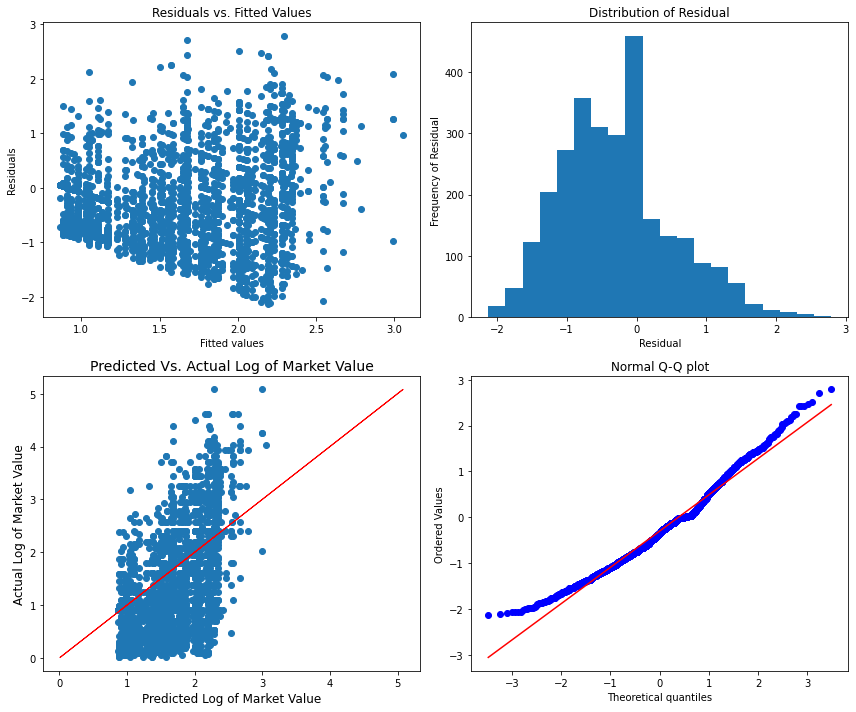

In [120]:
# Find the residuals and predictions
AB_model_predict = AB_model.predict(X_orig_test_scaled)
AB_model_resid = y_orig_log_test - AB_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(AB_model_predict, AB_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(AB_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(AB_model_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(AB_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals does not look normally distributed and moreover, the model is not predicting the market values well. I will try to find the best model for the AdaBoost by hyperparameter tuning using gridsearch. I will be using 5 folds for the cross validation.

In [70]:
# Hyperparameter tuning to improve model performance using gridsearch

# Set parameter grid
AB_params = {'learning_rate': [0.01,0.02,0.03,0.04,0.5],
              'n_estimators' : [10,50,100,250,500]
             }

In [71]:
# Fit gridsearch
AB_grid = GridSearchCV(estimator = AB_model, param_grid = AB_params, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [72]:
# Fit and find the best model
AB_grid.fit(X_orig_train_scaled, y_orig_log_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.5],
                         'n_estimators': [10, 50, 100, 250, 500]},
             verbose=2)

In [73]:
# Dispaly the best parameters
AB_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

The gridsearch outputted the best parameters for the model. I will now fit the model with the optimized hyperparameter to see it's performance.

In [82]:
# Run Ada Boosting Regressor with hyperparameters
# Instantiate
AB_model_1 = AdaBoostRegressor(learning_rate=0.01, n_estimators=500, random_state=21)
# Fit model
AB_model_1.fit(X_orig_train_scaled, y_orig_log_train)
# Print Score
print(f'R^2 on  train set: {round(AB_model_1.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test set: {round(AB_model_1.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.33
R^2 on test set: 0.31


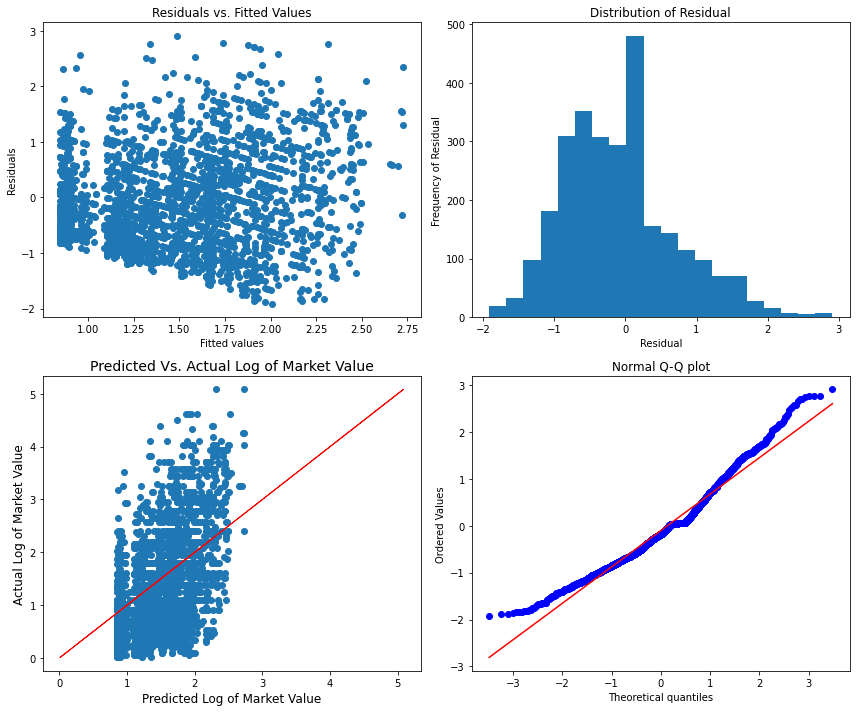

In [119]:
# Find the residuals and predictions
AB_model_1_predict = AB_model_1.predict(X_orig_test_scaled)
AB_model_1_resid = y_orig_log_test - AB_model_1_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(AB_model_1_predict, AB_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(AB_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(AB_model_1_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(AB_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

In [193]:
# Print the MAE
mean_AB_model_1_mae = -np.mean(cross_val_score(AB_model_1, X_orig_train_scaled, y_orig_log_train, 
                                               cv=5, scoring='neg_mean_absolute_error'))
mean_AB_model_1_mae

0.618338049449773

In [194]:
# Calculate the RMSE
AB_model_1_cross_val_train = cross_val_score(AB_model_1, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
AB_model_1_cross_val_test = cross_val_score(AB_model_1, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)
# Find the train Results
AB_model_1_cv_train_mean = round(-(AB_model_1_cross_val_train.mean()),2)
# Find the test Results
AB_model_1_cv_test_mean = round(-(AB_model_1_cross_val_test.mean()),2)
print(f'RMSE on train: {AB_model_1_cv_train_mean}')
print(f'RMSE on test: {AB_model_1_cv_test_mean}')

RMSE on train: 0.8
RMSE on test: 0.78


The R^2 is still very low, lower than the Random Forest best model. There was no improvement in the residuals and the predictions. I will not explore this model further since it is not performing that well. I will move on to another type of Boosting called Gradient Boost. 

### Gradient Boosting Regressor

I will first fit a Gradient Boost Regressor with default hyperparameters on the scaled data to see the performance.

In [85]:
# Import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Run Gradient Boosting Regressor with default parameter
# Instantiate
GB_model = GradientBoostingRegressor()
# Fit model
GB_model.fit(X_orig_train_scaled, y_orig_log_train)
# Print Score
print(f'R^2 on  train set: {round(GB_model.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test set: {round(GB_model.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.49
R^2 on test set: 0.43


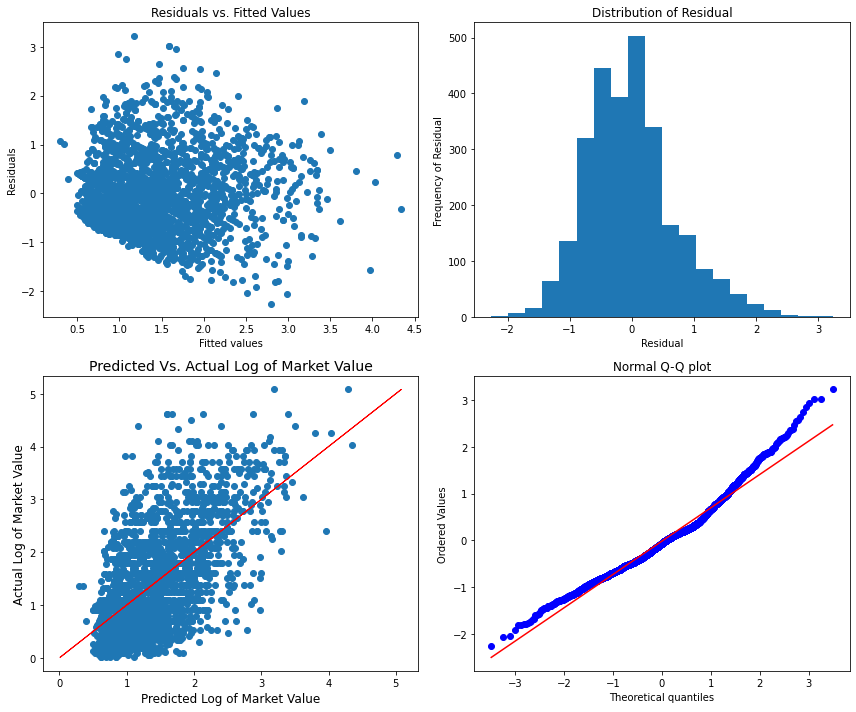

In [118]:
# Find the residuals and predictions
GB_model_predict = GB_model.predict(X_orig_test_scaled)
GB_model_resid = y_orig_log_test - GB_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(GB_model_predict, GB_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(GB_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(GB_model_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(GB_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

This is a much better model. The R^2 has improved by more than 20% from the baseline model and there is much less overfitting present than the Random Forest model. The residuals are normal and the Q-Q plot shows linearity. The model prediction is also much better than the previous models. I will now check the mean absolte error and the root mean squared error.

In [87]:
# Print the MAE
mean_GB_model_mae = -np.mean(cross_val_score(GB_model, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_GB_model_mae

0.5600282005968535

In [88]:
# Calculate the RMSE
GB_model_cv_train = cross_val_score(GB_model, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
GB_model_cv_test = cross_val_score(GB_model, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
GB_model_cv_train_mean = round(-(GB_model_cv_train.mean()),2)
# Find the test Results
GB_model_cv_test_mean = round(-(GB_model_cv_test.mean()),2)

print(f'RMSE on train: {GB_model_cv_train_mean}')
print(f'RMSE on test: {GB_model_cv_test_mean}')

RMSE on train: 0.74
RMSE on test: 0.73


Both the MAE and RMSE are a little higher than the Random Forest model. But thi is definitely a good model which shgould be explored further. I will find the best Gradient Boost model by hyperparameter tuning using gridsearch. I will be using 5 folds for the cross validation.

In [75]:
# Hyperparameter tuning to improve model performance using gridsearch

# Create estimators
GB_estimators = [('scaling', StandardScaler()),
                 ('model', GradientBoostingRegressor(loss = 'squared_error',random_state=21))]
# Instantiate pipeline
GB_pipe = Pipeline(GB_estimators)

# Set loss grid
loss = ['squared_error','absolute_error', 'huber', 'quantile']

# Set parameter grid
GB_params = {'scaling': [StandardScaler(), None],
             'model__loss':loss}

# Create gridsearch
GB_grid = GridSearchCV(GB_pipe, GB_params, verbose = 2, cv = 5)

# Fit grid
GB_fitted_search = GB_grid.fit(X_orig_train, y_orig_log_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END model__loss=squared_error, scaling=StandardScaler(); total time=   0.1s
[CV] END model__loss=squared_error, scaling=StandardScaler(); total time=   0.0s
[CV] END model__loss=squared_error, scaling=StandardScaler(); total time=   0.0s
[CV] END model__loss=squared_error, scaling=StandardScaler(); total time=   0.0s
[CV] END model__loss=squared_error, scaling=StandardScaler(); total time=   0.0s
[CV] END ............model__loss=squared_error, scaling=None; total time=   0.0s
[CV] END ............model__loss=squared_error, scaling=None; total time=   0.0s
[CV] END ............model__loss=squared_error, scaling=None; total time=   0.0s
[CV] END ............model__loss=squared_error, scaling=None; total time=   0.0s
[CV] END ............model__loss=squared_error, scaling=None; total time=   0.0s
[CV] END model__loss=absolute_error, scaling=StandardScaler(); total time=   0.0s
[CV] END model__loss=absolute_error, scaling=Sta

In [76]:
# Print the best parameters
GB_fitted_search.best_params_

{'model__loss': 'huber', 'scaling': StandardScaler()}

In [77]:
# Print the R^2 
print(f'R^2 on  train set: {round(GB_fitted_search.score(X_orig_train, y_orig_log_train),2)}')
print(f'R^2 on test test set: {round(GB_fitted_search.score(X_orig_test, y_orig_log_test),2)}')

R^2 on  train set: 0.48
R^2 on test test set: 0.42


The R^2 has decreased compared to the previous model. I will still fit a model with the hyperparameters to see the predictions.

In [95]:
# Run Gradient Boosting Regressor with the hyperparameters
# Instantiate
GB_model_1 = GradientBoostingRegressor(loss='huber', random_state=21)
# Fit
GB_model_1.fit(X_orig_train_scaled, y_orig_log_train)
# Score
print(f'R^2 on  train set: {round(GB_model_1.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test test set: {round(GB_model_1.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.48
R^2 on test test set: 0.42


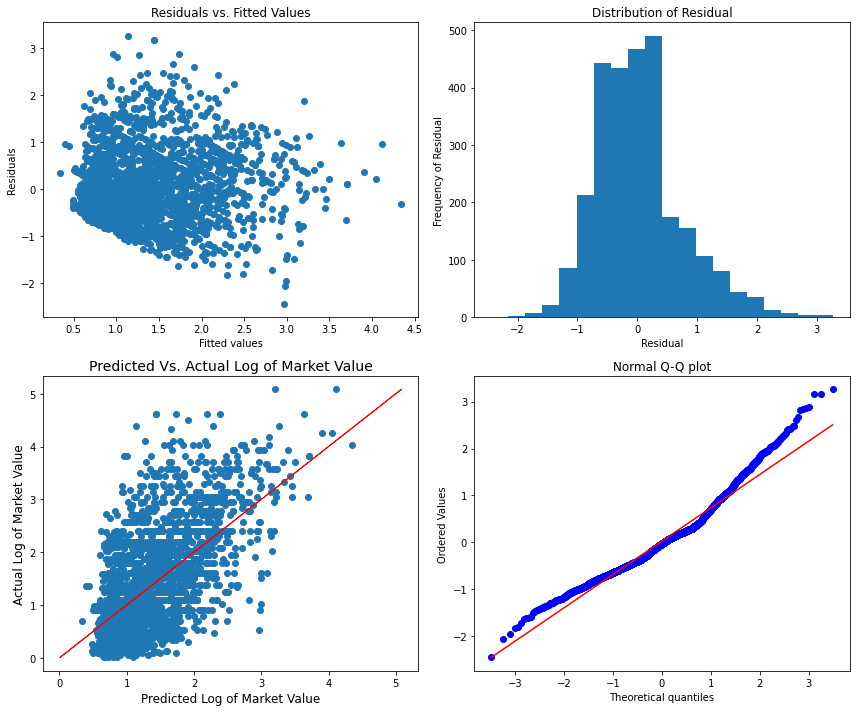

In [117]:
# Find the residuals and predictions
GB_model_1_predict = GB_model_1.predict(X_orig_test_scaled)
GB_model_1_resid = y_orig_log_test - GB_model_1_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(GB_model_1_predict, GB_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(GB_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(GB_model_1_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(GB_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

There was no improvement in the model. The first Gradient Boost model was by far the best among all models. I will run another gridsearch this time I will optimize the `n_estimators`, `min_samples_leaf`, and `learning rate`. I will again use the 5 folds validation.

In [78]:
# Hyperparameter tuning to improve model performance using gridsearch

# Create estimators
GB_estimators_1 = [('model', GradientBoostingRegressor(random_state=21))]

# Instantiate pipeline
GB_pipe_1 = Pipeline(GB_estimators_1)

learn_rate = [0.5, 1]
n_estimator = list(range(50, 151, 50))
criterion = ['friedman_mse', 'huber', 'squared_error', 'absolute_error']
subsample = [0.5, 0.75]
max_depth = list(range(1, 10, 4))
min_samples_leaf = list(range(1, 22, 10))

# Set the parameter grid
GB_params_1 = {'model__learning_rate':learn_rate,
               'model__n_estimators':n_estimator,
               'model__criterion':criterion,
               'model__subsample':subsample,
               'model__max_depth':max_depth,
               'model__min_samples_leaf':min_samples_leaf}

# Create grid
GB_grid_1 = GridSearchCV(GB_pipe_1, GB_params_1, verbose=2, cv = 5)

# Fit the grid
GB_fitted_grid_1 = GB_grid_1.fit(X_orig_train_scaled, y_orig_log_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.1s
[CV] END model__criterion=friedman_mse, model_

[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=1, model__min

[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.5s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.5s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.5s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.75; total time=   0.6s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.75; total time=   0.6s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_lea

/Users/nazhadbari/opt/anaconda3/envs/boosting/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.0s
[CV] END ...............learning_rate=0.01, n_estimators=250; total time=   5.0s
[CV] END ...............learning_rate=0.01, n_estimators=250; total time=   4.9s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=  11.1s
[CV] END ...............learning_rate=0.02, n_estimators=100; total time=   1.9s
[CV] END ...............learning_rate=0.02, n_estimators=250; total time=   5.8s
[CV] END ...............learning_rate=0.02, n_estimators=250; total time=   6.3s
[CV] END ...............learning_rate=0.02, n_estimators=500; total time=  11.5s
[CV] END ...............learning_rate=0.03, n_estimators=100; total time=   2.0s
[CV] END ...............learning_rate=0.03, n_estimators=100; total time=   2.0s
[CV] END ...............lear

/Users/nazhadbari/opt/anaconda3/envs/boosting/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=250; total time=   4.8s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=  10.1s
[CV] END ................learning_rate=0.02, n_estimators=50; total time=   1.3s
[CV] END ................learning_rate=0.02, n_estimators=50; total time=   1.4s
[CV] END ................learning_rate=0.02, n_estimators=50; total time=   1.4s
[CV] END ...............learning_rate=0.02, n_estimators=100; total time=   1.9s
[CV] END ...............learning_rate=0.02, n_estimators=100; total time=   2.3s
[CV] END ...............learning_rate=0.02, n_estimators=250; total time=   5.8s
[CV] END ...............lear

/Users/nazhadbari/opt/anaconda3/envs/boosting/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.9s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.9s
[CV] END ...............learning_rate=0.01, n_estimators=250; total time=   5.0s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=  10.1s
[CV] END ................learning_rate=0.02, n_estimators=10; total time=   0.2s
[CV] END ................learning_rate=0.02, n_estimators=10; total time=   0.2s
[CV] END ................learning_rate=0.02, n_estimators=10; total time=   0.2s
[CV] END ................learning_rate=0.02, n_estimators=10; total time=   0.3s
[CV] END ................learning_rate=0.02, n_estimators=10; total time=   0.2s
[CV] END ................learning_rate=0.02, n_estimators=50; total time=   1.2s
[CV] END ................lea

/Users/nazhadbari/opt/anaconda3/envs/boosting/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   1.0s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   1.7s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   1.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   1.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   1.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samp

[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=5, model__min_samples_

[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   2.0s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   2.0s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   2.0s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   2.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   2.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samp

[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.7s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.7s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.6s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   1.0s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   1.0s
[CV] END model__criterion=friedman_mse, model__learning_rate=0.5, model__max_depth=9, model__min_sample

[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, mo

[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21

[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   1.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   1.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   1.4s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   1.8s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   1.8s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, mo

[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.6s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.8s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.8s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.8s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.8s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21

[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   3.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   3.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   3.3s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   3.1s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.7s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11,

[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   1.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   1.2s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.75; total time=   1.9s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.75; total time=   1.9s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.75; total time=   1.9s
[CV] END model__criterion=friedman_mse, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf

[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=150,

[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=50, model_

[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=100, model

[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, mo

[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=

[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=150, model__sub

[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=huber, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=

[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samp

[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=1, model_

[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=5, model__

[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=0.5, model__max_depth=9, model__min_

[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf

[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=1, model__min_samples_

[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf

[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=squared_error, model__learning_rate=1, model__max_depth=9, model__min_samples_

[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=1, model__min_samples_leaf=1, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=1, model_

[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_s

[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=5, mo

[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=0.5, model__max_depth=9, m

[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=1, model__min_samples_leaf=11, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=1, model__min_samples_

[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_

[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=100, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_samples_leaf=21, model__n_estimators=150, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=5, model__min_sa

[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=11, model__n_estimators=150, model__subsample=0.75; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=9, model__min_samples_leaf=21, model__n_estimators=50, model__subsample=0.5; total time=   0.0s
[CV] END model__criterion=absolute_error, model__learning_rate=1, model__max_depth=9, model__min_sample

In [79]:
# Display the best model
best_GB = GB_fitted_grid_1.best_estimator_

best_GB

Pipeline(steps=[('model',
                 GradientBoostingRegressor(learning_rate=0.5, max_depth=5,
                                           min_samples_leaf=21, n_estimators=50,
                                           random_state=21, subsample=0.75))])

In [80]:
# Print the best parameters
GB_fitted_grid_1.best_params_

{'model__criterion': 'friedman_mse',
 'model__learning_rate': 0.5,
 'model__max_depth': 5,
 'model__min_samples_leaf': 21,
 'model__n_estimators': 50,
 'model__subsample': 0.75}

In [81]:
# Print the R^2
print(f'R^2 on  train set: {round(GB_fitted_grid_1.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test test set: {round(GB_fitted_grid_1.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.63
R^2 on test test set: 0.39


The test R^2 did not increase rather it is lower than the previous models. I will be considering the first Gradient Boost, GB_model as the best. Now I will move on to a more powerful Boosting model, the Extreme Gradient Boost or XGBoost Regressor.

### XGBoost Regressor

I will first run a XGBoost Regressor on the scaled data using the deafult hyperparameter.

In [114]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

# Run XGBoost Regressor with default parameter
# Instantiate
XGB_model = XGBRegressor()
# Fit model
XGB_model.fit(X_orig_train_scaled, y_orig_log_train)
# Print Score
print(f'R^2 on  train set: {round(XGB_model.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test set: {round(XGB_model.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.87
R^2 on test set: 0.44


The R<sup>2</sup> is much higher than the AdaBoost and GB Boost models but it is still still lower than the Random Forest model. Although there is severe overfitting present. Let me look at the residuals and predictions and also the MAE and RMSE. 

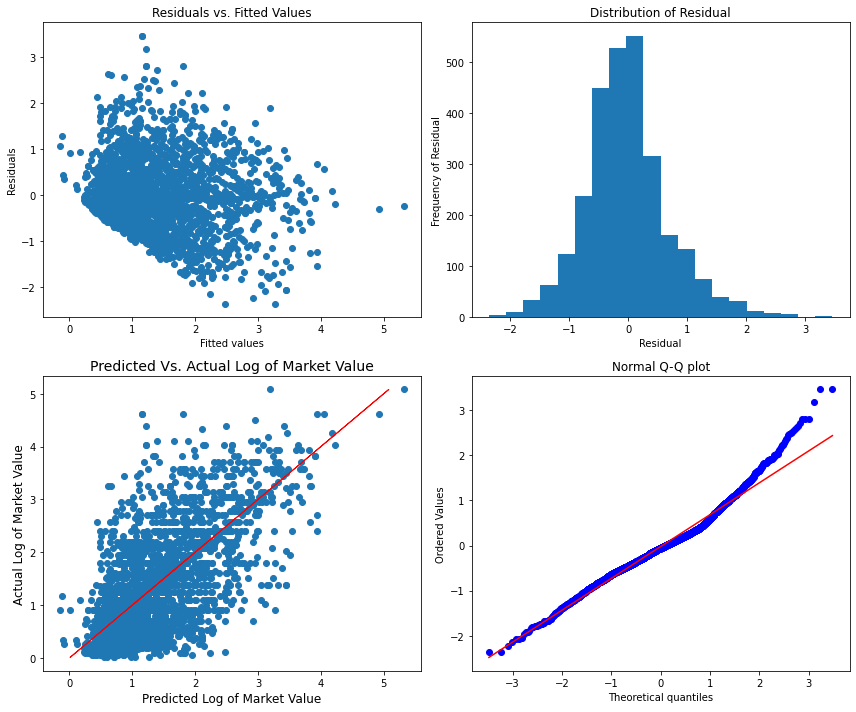

In [116]:
# Find the residuals and predictions
XGB_model_predict = XGB_model.predict(X_orig_test_scaled)
XGB_model_resid = y_orig_log_test - XGB_model_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(XGB_model_predict, XGB_model_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(XGB_model_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(XGB_model_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(XGB_model_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The residuals are normally distributed and the model has better prediction than the previous models. Moreover, the Q-Q plot is also more linear. Let me check the MAE and RMSE.

In [127]:
# Print the MAE
mean_XGB_model_mae = -np.mean(cross_val_score(XGB_model, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_XGB_model_mae

0.5470107883249605

In [128]:
# Calculate the RMSE
XGB_model_cv_train = cross_val_score(XGB_model, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
XGB_model_cv_test = cross_val_score(XGB_model, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
XGB_model_cv_train_mean = round(-(XGB_model_cv_train.mean()),2)
# Find the test Results
XGB_model_cv_test_mean = round(-(XGB_model_cv_test.mean()),2)

print(f'RMSE on train: {XGB_model_cv_train_mean}')
print(f'RMSE on test: {XGB_model_cv_test_mean}')

RMSE on train: 0.74
RMSE on test: 0.75


The MAE and RMSE are almost similar to the best Random Forest model. I will explore this model further by trying to find the best XGBoost model by hyperparameter tuning using gridsearch. 

In [52]:
# Hyperparameter tuning to improve model performance using gridsearch
# import the xgboost package
import xgboost as xgb

# Create a set of parameter
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

# Instantiate 
xgbr = xgb.XGBRegressor(seed = 20)

# Create the grid
XGB_grid = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   verbose=1)
# Fit grid
XGB_grid.fit(X_orig_train_scaled, y_orig_log_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=20,
                                    subsample=None, tree_method=None,
                       

In [53]:
# Print the best parameters
print("Best parameters:", XGB_grid.best_params_)

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}


In [54]:
# Print the R^2 for best model
print(f'R^2 on  train set: {round(XGB_grid.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test test set: {round(XGB_grid.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.96
R^2 on test test set: 0.49


I found the best hyperparameters for the model and the R^2 has also improved. Now I will run another XGB model using the hyperparameters.

In [129]:
# Run XGBoost Regressor with hyperparameter
# Instantiate
XGB_model_1 = XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=1000)
# Fit model
XGB_model_1.fit(X_orig_train_scaled, y_orig_log_train)
# Print Score
print(f'R^2 on  train set: {round(XGB_model_1.score(X_orig_train_scaled, y_orig_log_train),2)}')
print(f'R^2 on test set: {round(XGB_model_1.score(X_orig_test_scaled, y_orig_log_test),2)}')

R^2 on  train set: 0.96
R^2 on test set: 0.49


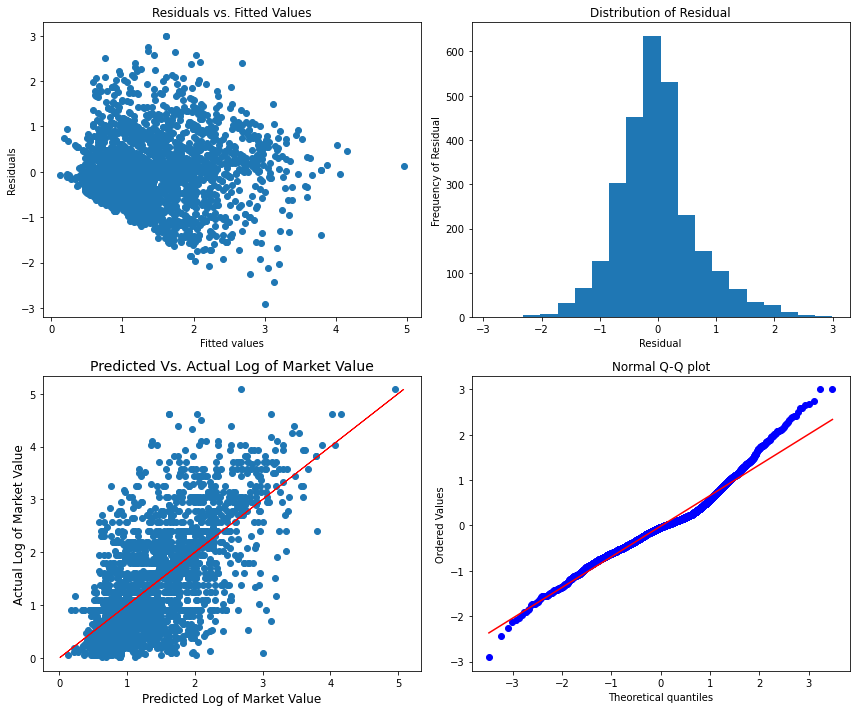

In [130]:
# Find the residuals and predictions
XGB_model_1_predict = XGB_model_1.predict(X_orig_test_scaled)
XGB_model_1_resid = y_orig_log_test - XGB_model_1_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(XGB_model_1_predict, XGB_model_1_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(XGB_model_1_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(XGB_model_1_predict, y_orig_log_test)
plt.plot(y_orig_log_test, y_orig_log_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(XGB_model_1_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

All the charts above point out that the model has improved. The predictions look much better than all of my models so far. Let me check the MAE and RMSE.

In [131]:
# Print the MAE
mean_XGB_model_1_mae = -np.mean(cross_val_score(XGB_model_1, X_orig_train_scaled, y_orig_log_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_XGB_model_1_mae

0.517882951149436

In [132]:
# Calculate the RMSE
XGB_model_1_cv_train = cross_val_score(XGB_model_1, X_orig_train_scaled, y_orig_log_train, scoring="neg_root_mean_squared_error",cv=5)
XGB_model_1_cv_test = cross_val_score(XGB_model_1, X_orig_test_scaled, y_orig_log_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
XGB_model_1_cv_train_mean = round(-(XGB_model_1_cv_train.mean()),2)
# Find the test Results
XGB_model_1_cv_test_mean = round(-(XGB_model_1_cv_test.mean()),2)

print(f'RMSE on train: {XGB_model_1_cv_train_mean}')
print(f'RMSE on test: {XGB_model_1_cv_test_mean}')

RMSE on train: 0.71
RMSE on test: 0.73


Both the MAE and RMSE has decreased compared to all other models so far. This is definitely the best I have so far. But the issue of overfitting still remains unanswered. I will now address the matter of overfitting and multicolinearity.

------

### Address the issue of overfitting and multicolinearity

Let me first look at the correlations between each variables with the target variable. 

In [142]:
# Look at correlation between each variable and Log of Market Value
final_df.corr()['log_MV'].sort_values(ascending=False)

log_MV                 1.000000
market_val_amnt_mil    0.812974
season                 0.348302
buying_team            0.313842
xG+xA/90               0.254590
npxG+xA/90             0.253476
xG/90                  0.224336
npxG/90                0.221458
xG                     0.217684
npxG+xA                0.215596
npxG                   0.214001
xA/90                  0.208997
MP                     0.159505
Min/90                 0.143545
Min                    0.143515
Starts                 0.137952
xA                     0.126156
Gls                    0.112334
Gls+Ast/90             0.112239
Gls+Ast-PK/90          0.109910
NP_Gls                 0.109463
Gls/90                 0.101257
Gls-PK/90              0.097986
Ast                    0.056385
Attacker               0.055181
Ast/90                 0.048951
Nationality            0.040156
PK                     0.036234
PK_Att                 0.024980
Midfielder             0.012591
CrdR                  -0.029855
Defender

The year, teams, and the goals columns have a higher correlation compared to the other columns. The player age, positions, and the number of yellow cards and red cards received by the players are negatively correlated to the Market Value. The age column being negatively correlated makes sense because as the players get older, their stamina decreases, their performance deteriorates and since they can't perform well the demand to have them play in a club decreases along with their Market Value. Moreover, most players retire after the age of 38.

In order to address the issue of multicolinearity I will check all the independent variables with respect to the target variable and also calculate the correlation coefficients between the independent variables and the target variable.

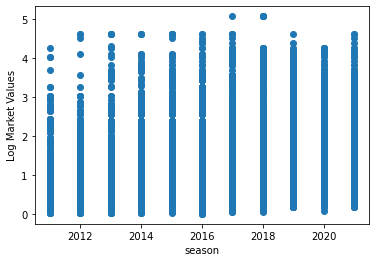

Corrlation coefficient between season and y_orig_log (0.3483016922550499, 3.0687641601956005e-239)



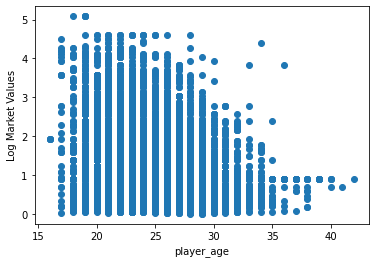

Corrlation coefficient between player_age and y_orig_log (-0.2905381266136907, 8.419400226345876e-164)



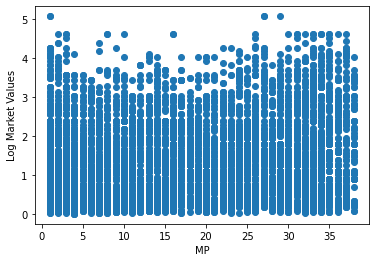

Corrlation coefficient between MP and y_orig_log (0.15950519729645043, 3.350793078316162e-49)



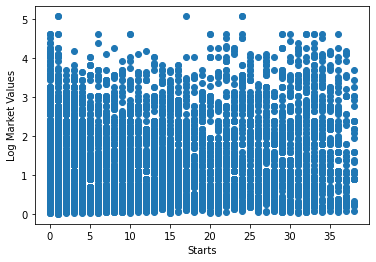

Corrlation coefficient between Starts and y_orig_log (0.13795166484192972, 3.973146773334205e-37)



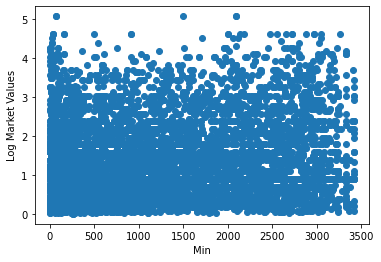

Corrlation coefficient between Min and y_orig_log (0.14351548881083842, 4.523007819966853e-40)



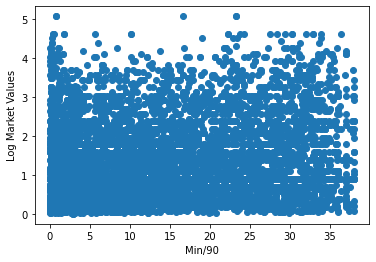

Corrlation coefficient between Min/90 and y_orig_log (0.14354508918709827, 4.359592720013842e-40)



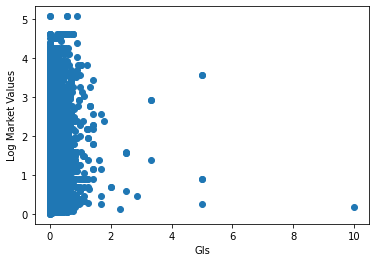

Corrlation coefficient between Gls and y_orig_log (0.11233412737498862, 4.180548001070803e-25)



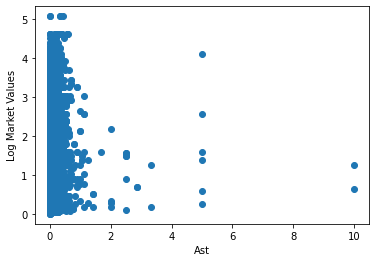

Corrlation coefficient between Ast and y_orig_log (0.05638506249958153, 2.1856989770448625e-07)



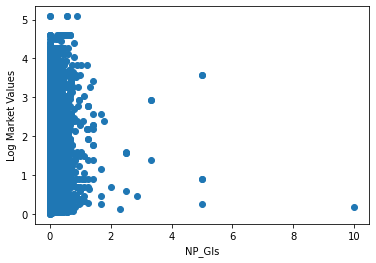

Corrlation coefficient between NP_Gls and y_orig_log (0.10946284809242737, 6.507280609700926e-24)



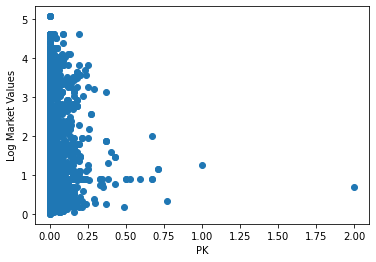

Corrlation coefficient between PK and y_orig_log (0.03623382048361627, 0.0008716230708638746)



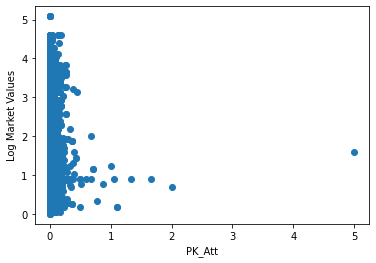

Corrlation coefficient between PK_Att and y_orig_log (0.02497997225282421, 0.021753589646656295)



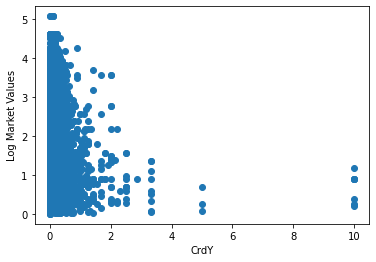

Corrlation coefficient between CrdY and y_orig_log (-0.046472624672973806, 1.9496135520770757e-05)



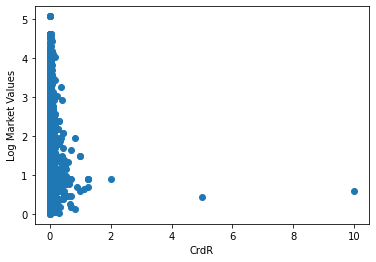

Corrlation coefficient between CrdR and y_orig_log (-0.029854726154332673, 0.0060951552726813815)



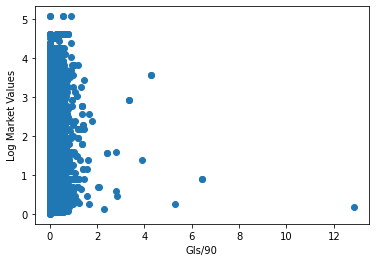

Corrlation coefficient between Gls/90 and y_orig_log (0.10125684474762761, 1.1213632456993356e-20)



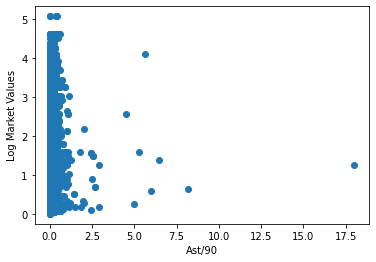

Corrlation coefficient between Ast/90 and y_orig_log (0.04895081138586575, 6.840789806854525e-06)



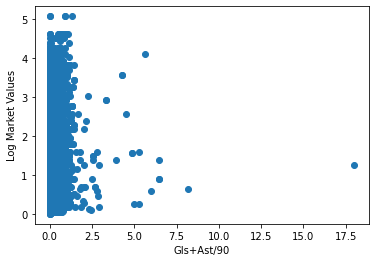

Corrlation coefficient between Gls+Ast/90 and y_orig_log (0.11223904641822019, 4.583621267543748e-25)



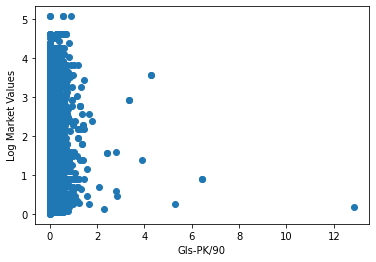

Corrlation coefficient between Gls-PK/90 and y_orig_log (0.09798605258280103, 1.8596900034299043e-19)



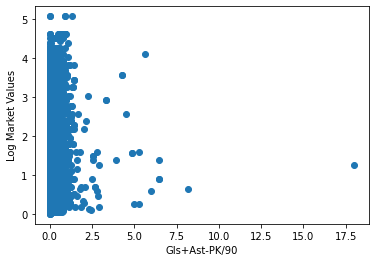

Corrlation coefficient between Gls+Ast-PK/90 and y_orig_log (0.10990996564577223, 4.263794127310874e-24)



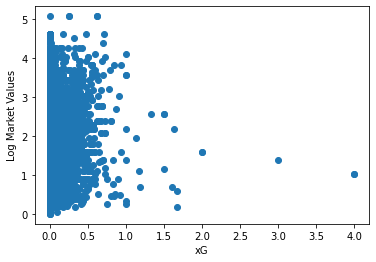

Corrlation coefficient between xG and y_orig_log (0.2176839253287191, 4.690078246976645e-91)



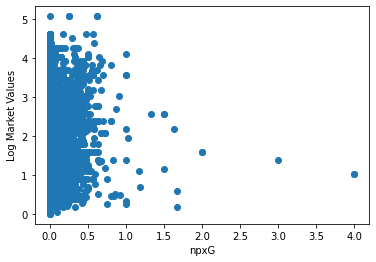

Corrlation coefficient between npxG and y_orig_log (0.21400106523302231, 5.410304550835586e-88)



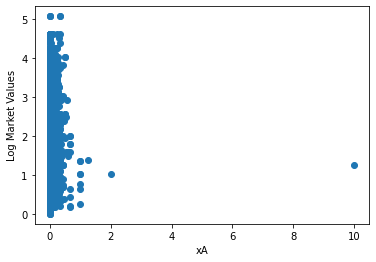

Corrlation coefficient between xA and y_orig_log (0.1261558118511892, 2.791550787953749e-31)



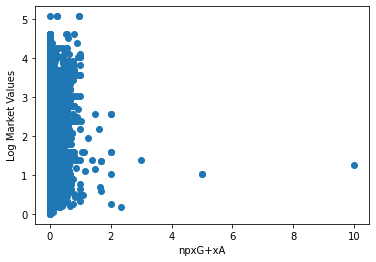

Corrlation coefficient between npxG+xA and y_orig_log (0.21559638606192283, 2.593173557610387e-89)



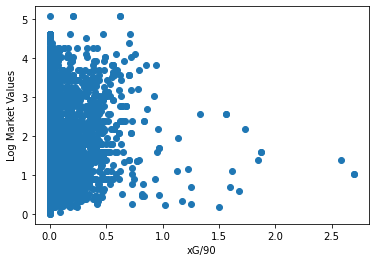

Corrlation coefficient between xG/90 and y_orig_log (0.22433628663983665, 9.88446633273434e-97)



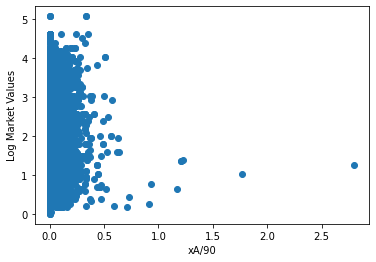

Corrlation coefficient between xA/90 and y_orig_log (0.20899663182035766, 6.35098728141836e-84)



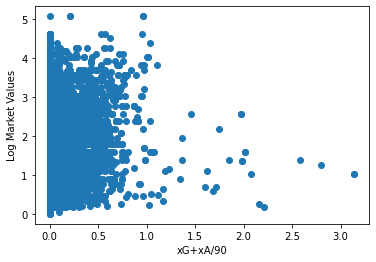

Corrlation coefficient between xG+xA/90 and y_orig_log (0.2545904188153906, 5.964289102447838e-125)



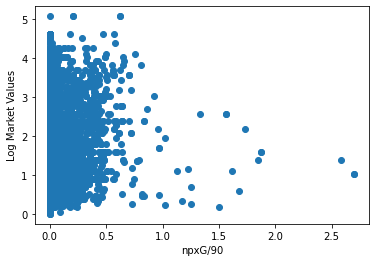

Corrlation coefficient between npxG/90 and y_orig_log (0.22145794148185438, 2.978321397592652e-94)



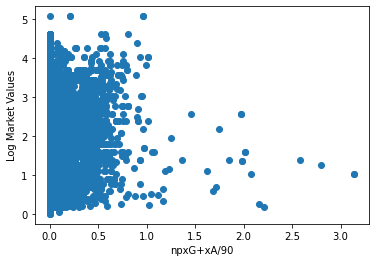

Corrlation coefficient between npxG+xA/90 and y_orig_log (0.25347566801007854, 7.70072120191536e-124)



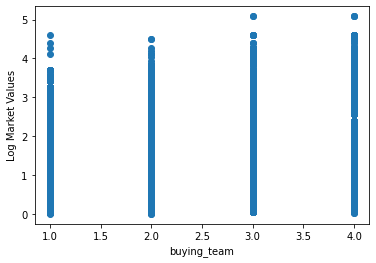

Corrlation coefficient between buying_team and y_orig_log (0.31384224402882466, 3.1140136337224565e-192)



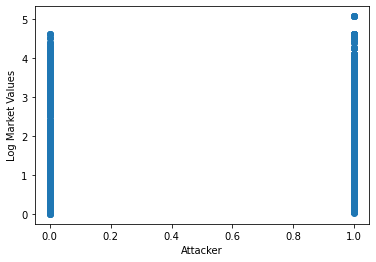

Corrlation coefficient between Attacker and y_orig_log (0.055180562439519215, 3.9381803646796663e-07)



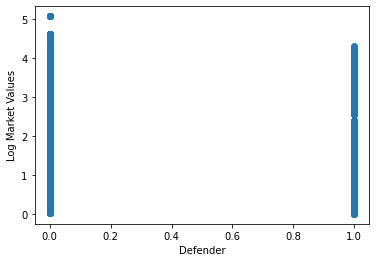

Corrlation coefficient between Defender and y_orig_log (-0.0446242119481151, 4.121651670646369e-05)



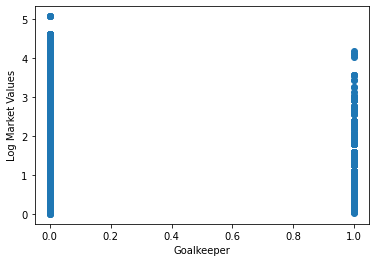

Corrlation coefficient between Goalkeeper and y_orig_log (-0.04904475520027238, 6.568041444151886e-06)



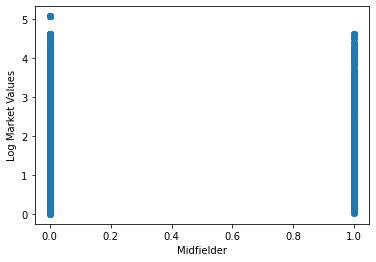

Corrlation coefficient between Midfielder and y_orig_log (0.01259110230101448, 0.2474867748200524)



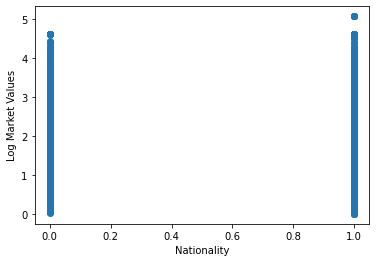

Corrlation coefficient between Nationality and y_orig_log (0.04015626896804031, 0.0002245718185379871)



In [141]:
# import package 
from scipy.stats import pearsonr

# Plot scatter plots between the independent variables and the target variable
for col in X_orig.columns:
    plt.figure()
    plt.scatter(X_orig[col], y_orig_log)
    plt.xlabel(col)
    plt.ylabel('Log Market Values')
    plt.show()
    
    print(f'Corrlation coefficient between {col} and y_orig_log {pearsonr(X_orig[col], y_orig_log)}')
    print('')

I will drop the columns with high multicolinearity and also the columns which are similar to each other.

In [143]:
# Drop some features and instantiate new independent and dependent variables 
X_1 = final_df.drop(columns=["market_val_amnt_mil", "log_MV", "Min/90", "Ast/90", "Gls+Ast/90", "Gls+Ast-PK/90"])
y_1 = final_df["log_MV"]

I will again check the independent variables with respect to the target variable and calculate the correlation coefficients between the independent variables and the target variable to check for multicolinearity.

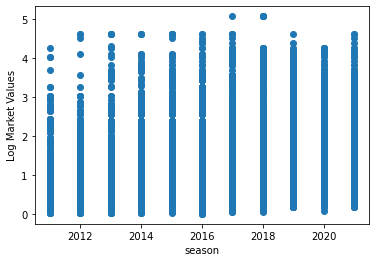

Corrlation coefficient between season and y_1 (0.3483016922550499, 3.0687641601956005e-239)



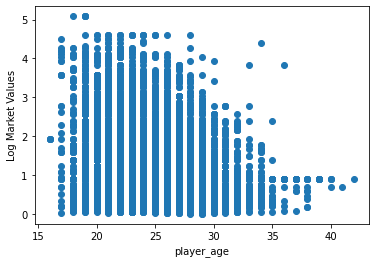

Corrlation coefficient between player_age and y_1 (-0.2905381266136907, 8.419400226345876e-164)



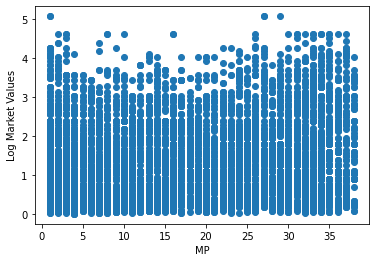

Corrlation coefficient between MP and y_1 (0.15950519729645043, 3.350793078316162e-49)



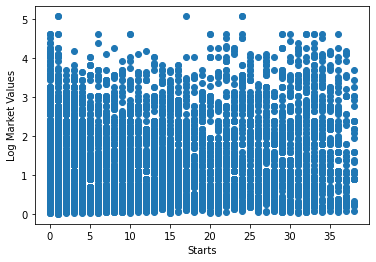

Corrlation coefficient between Starts and y_1 (0.13795166484192972, 3.973146773334205e-37)



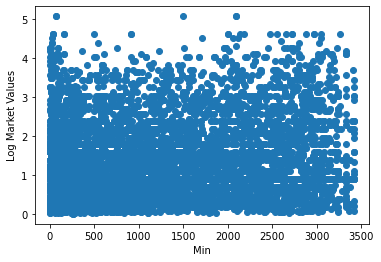

Corrlation coefficient between Min and y_1 (0.14351548881083842, 4.523007819966853e-40)



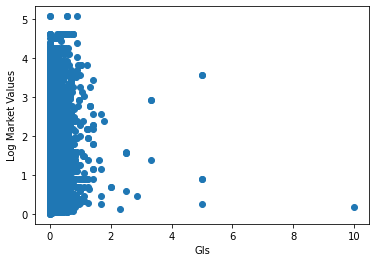

Corrlation coefficient between Gls and y_1 (0.11233412737498862, 4.180548001070803e-25)



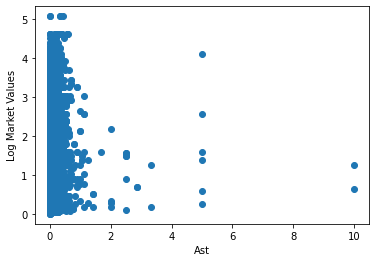

Corrlation coefficient between Ast and y_1 (0.05638506249958153, 2.1856989770448625e-07)



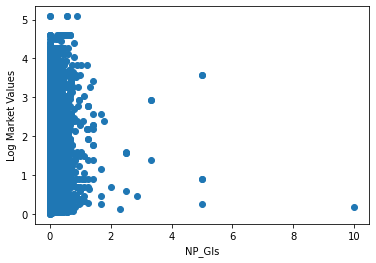

Corrlation coefficient between NP_Gls and y_1 (0.10946284809242737, 6.507280609700926e-24)



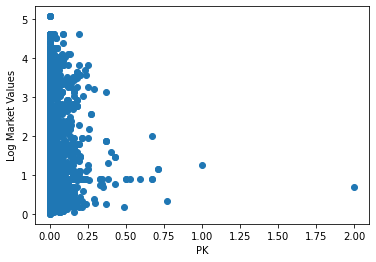

Corrlation coefficient between PK and y_1 (0.03623382048361627, 0.0008716230708638746)



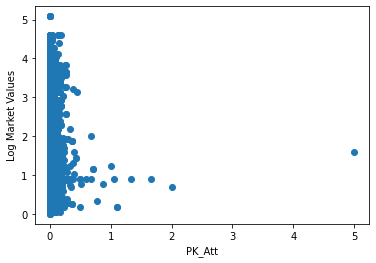

Corrlation coefficient between PK_Att and y_1 (0.02497997225282421, 0.021753589646656295)



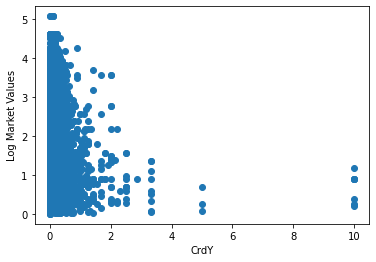

Corrlation coefficient between CrdY and y_1 (-0.046472624672973806, 1.9496135520770757e-05)



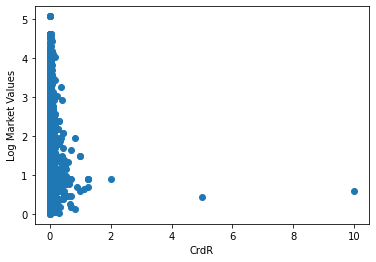

Corrlation coefficient between CrdR and y_1 (-0.029854726154332673, 0.0060951552726813815)



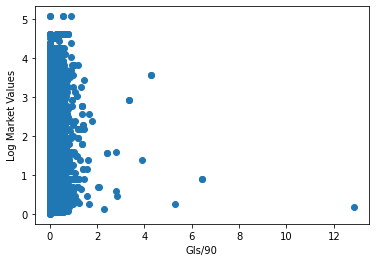

Corrlation coefficient between Gls/90 and y_1 (0.10125684474762761, 1.1213632456993356e-20)



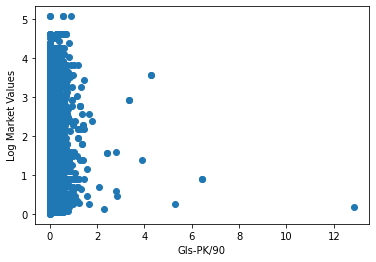

Corrlation coefficient between Gls-PK/90 and y_1 (0.09798605258280103, 1.8596900034299043e-19)



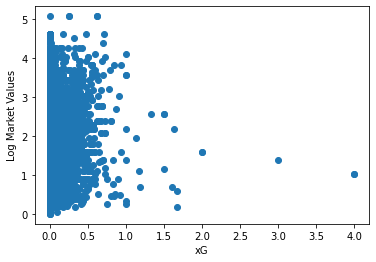

Corrlation coefficient between xG and y_1 (0.2176839253287191, 4.690078246976645e-91)



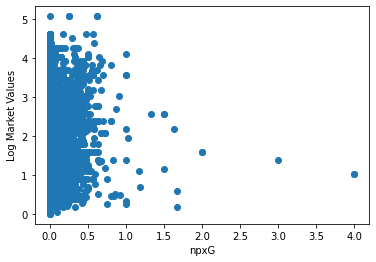

Corrlation coefficient between npxG and y_1 (0.21400106523302231, 5.410304550835586e-88)



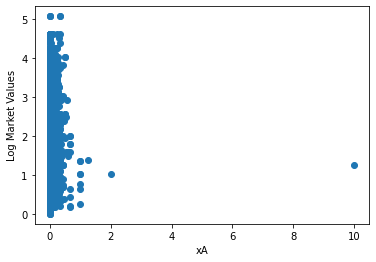

Corrlation coefficient between xA and y_1 (0.1261558118511892, 2.791550787953749e-31)



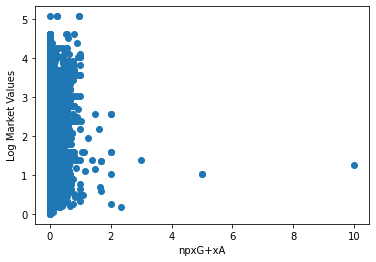

Corrlation coefficient between npxG+xA and y_1 (0.21559638606192283, 2.593173557610387e-89)



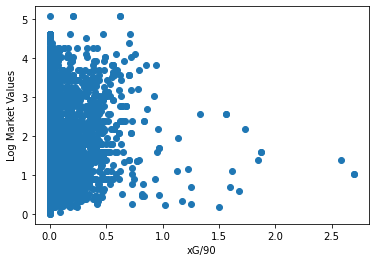

Corrlation coefficient between xG/90 and y_1 (0.22433628663983665, 9.88446633273434e-97)



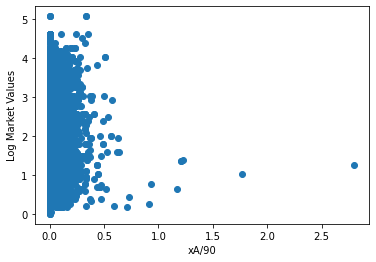

Corrlation coefficient between xA/90 and y_1 (0.20899663182035766, 6.35098728141836e-84)



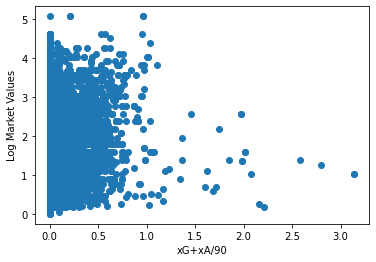

Corrlation coefficient between xG+xA/90 and y_1 (0.2545904188153906, 5.964289102447838e-125)



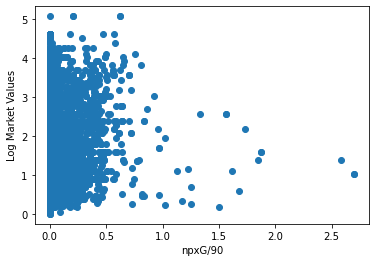

Corrlation coefficient between npxG/90 and y_1 (0.22145794148185438, 2.978321397592652e-94)



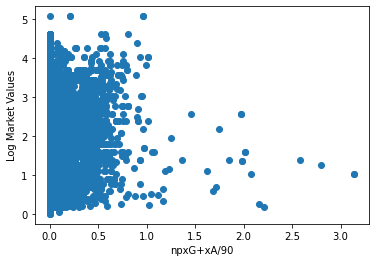

Corrlation coefficient between npxG+xA/90 and y_1 (0.25347566801007854, 7.70072120191536e-124)



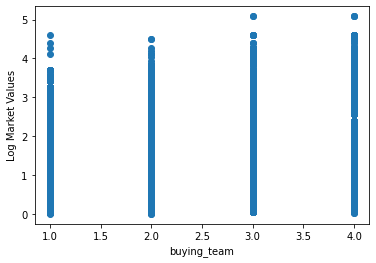

Corrlation coefficient between buying_team and y_1 (0.31384224402882466, 3.1140136337224565e-192)



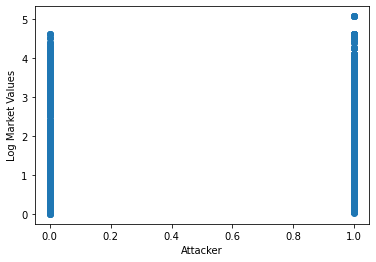

Corrlation coefficient between Attacker and y_1 (0.055180562439519215, 3.9381803646796663e-07)



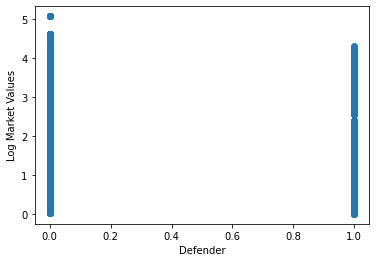

Corrlation coefficient between Defender and y_1 (-0.0446242119481151, 4.121651670646369e-05)



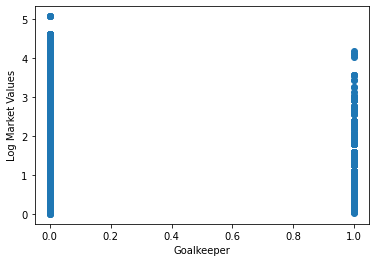

Corrlation coefficient between Goalkeeper and y_1 (-0.04904475520027238, 6.568041444151886e-06)



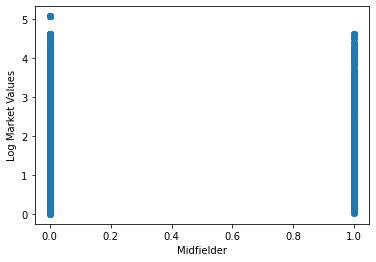

Corrlation coefficient between Midfielder and y_1 (0.01259110230101448, 0.2474867748200524)



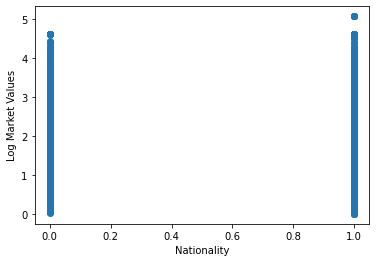

Corrlation coefficient between Nationality and y_1 (0.04015626896804031, 0.0002245718185379871)



In [144]:
# Plot scatter plots between the independent variables and the target variable
for col in X_1.columns:
    plt.figure()
    plt.scatter(X_1[col], y_1)
    plt.xlabel(col)
    plt.ylabel('Log Market Values')
    plt.show()
    
    print(f'Corrlation coefficient between {col} and y_1 {pearsonr(X_1[col], y_1)}')
    print('')

I can still see some features with high colinearity, speciafically the `Starts`, `Min/90`, `npxG+xA/90`, etc. I will drop these columns and then again instantiate the independent and dependent variables.

In [161]:
# Drop some features and instantiate new independent and dependent variables 
X_2 = final_df.drop(columns=["market_val_amnt_mil", "log_MV", "Min/90", "Ast/90", "Gls+Ast/90", "Gls+Ast-PK/90",
                            "npxG+xA/90", "xG+xA/90", "Gls/90", "Gls-PK/90", "npxG/90", "xG/90", "xA/90", "Starts"])
y_2 = final_df["log_MV"]

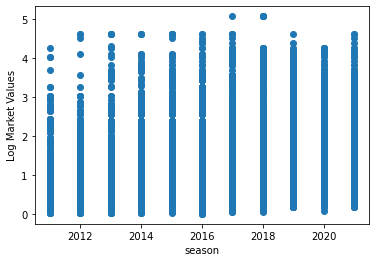

Corrlation coefficient between season and y_2 (0.3483016922550499, 3.0687641601956005e-239)



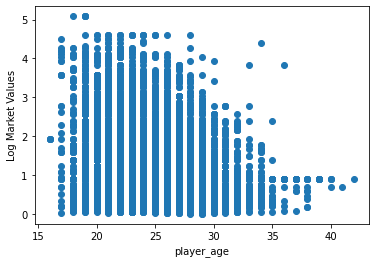

Corrlation coefficient between player_age and y_2 (-0.2905381266136907, 8.419400226345876e-164)



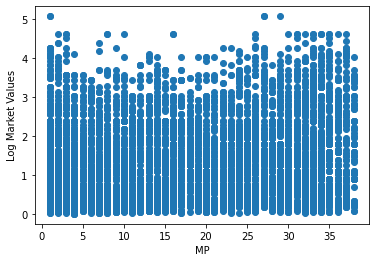

Corrlation coefficient between MP and y_2 (0.15950519729645043, 3.350793078316162e-49)



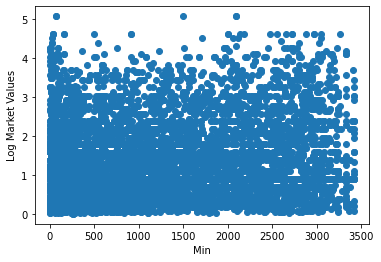

Corrlation coefficient between Min and y_2 (0.14351548881083842, 4.523007819966853e-40)



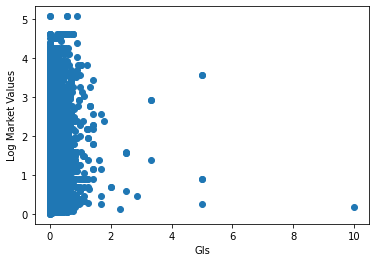

Corrlation coefficient between Gls and y_2 (0.11233412737498862, 4.180548001070803e-25)



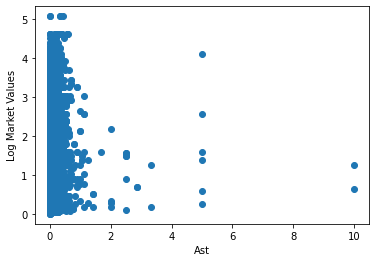

Corrlation coefficient between Ast and y_2 (0.05638506249958153, 2.1856989770448625e-07)



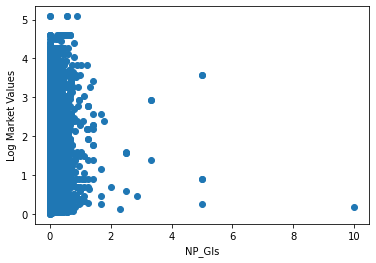

Corrlation coefficient between NP_Gls and y_2 (0.10946284809242737, 6.507280609700926e-24)



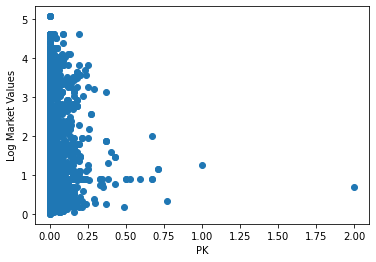

Corrlation coefficient between PK and y_2 (0.03623382048361627, 0.0008716230708638746)



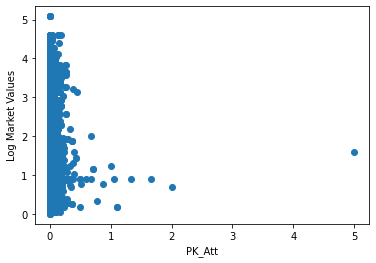

Corrlation coefficient between PK_Att and y_2 (0.02497997225282421, 0.021753589646656295)



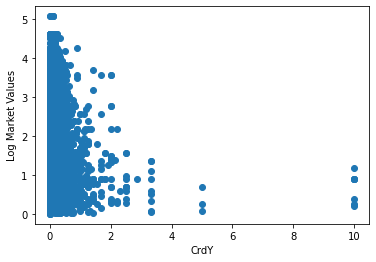

Corrlation coefficient between CrdY and y_2 (-0.046472624672973806, 1.9496135520770757e-05)



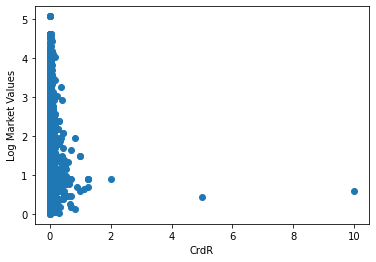

Corrlation coefficient between CrdR and y_2 (-0.029854726154332673, 0.0060951552726813815)



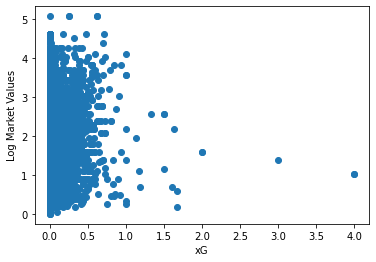

Corrlation coefficient between xG and y_2 (0.2176839253287191, 4.690078246976645e-91)



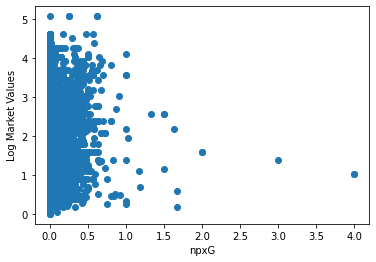

Corrlation coefficient between npxG and y_2 (0.21400106523302231, 5.410304550835586e-88)



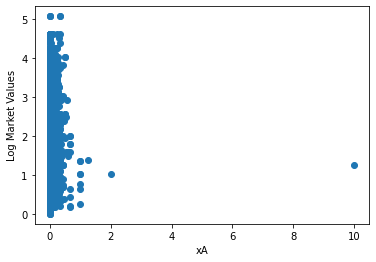

Corrlation coefficient between xA and y_2 (0.1261558118511892, 2.791550787953749e-31)



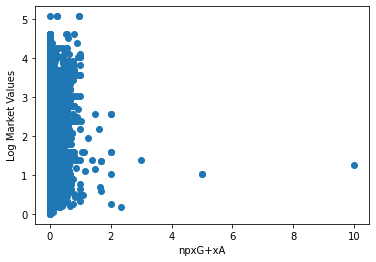

Corrlation coefficient between npxG+xA and y_2 (0.21559638606192283, 2.593173557610387e-89)



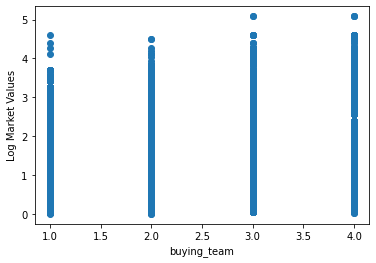

Corrlation coefficient between buying_team and y_2 (0.31384224402882466, 3.1140136337224565e-192)



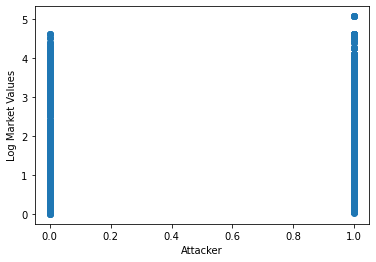

Corrlation coefficient between Attacker and y_2 (0.055180562439519215, 3.9381803646796663e-07)



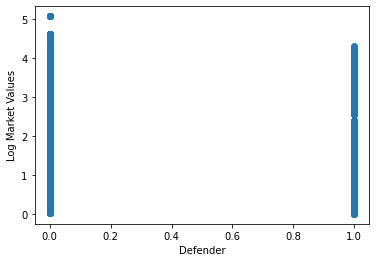

Corrlation coefficient between Defender and y_2 (-0.0446242119481151, 4.121651670646369e-05)



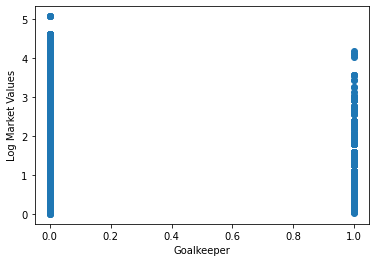

Corrlation coefficient between Goalkeeper and y_2 (-0.04904475520027238, 6.568041444151886e-06)



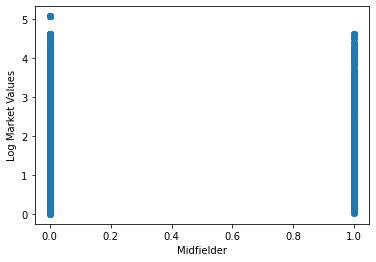

Corrlation coefficient between Midfielder and y_2 (0.01259110230101448, 0.2474867748200524)



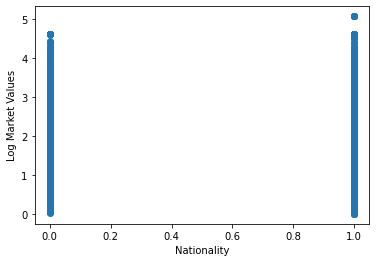

Corrlation coefficient between Nationality and y_2 (0.04015626896804031, 0.0002245718185379871)



In [162]:
# Plot scatter plots between the independent variables and the target variable
for col in X_2.columns:
    plt.figure()
    plt.scatter(X_2[col], y_2)
    plt.xlabel(col)
    plt.ylabel('Log Market Values')
    plt.show()
    
    print(f'Corrlation coefficient between {col} and y_2 {pearsonr(X_2[col], y_2)}')
    print('')

This looks much better than before. I will now split my data into train and test and then fit models into the data.

In [163]:
# splitting our data into train and test sets
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.33, random_state=42)

In [164]:
# Check the shape of each set
print(X_2_train.shape)
print(X_2_test.shape)
print(y_2_train.shape)
print(y_2_test.shape)

(5653, 21)
(2785, 21)
(5653,)
(2785,)


After checking the multicolinearity and dropping some variables, I now have 21 features. I will scale the data using `StandardScalar` and fit it into a Linear Regression model.

In [165]:
# Scale and Transform data
scaler = StandardScaler()
scaler.fit(X_2_train)
X_2_train_scaled = scaler.transform(X_2_train)
X_2_test_scaled = scaler.transform(X_2_test)

In [166]:
# Apply Linear Regression model to unscaled data
# Instantiate the model
lr_model_3 = LinearRegression()
# Fit
lr_model_3.fit(X_2_train_scaled, y_2_train)
# Score model
print(f'R^2 on train set: {round(lr_model_3.score(X_2_train_scaled, y_2_train),2)}')
print(f'R^2 on test set: {round(lr_model_3.score(X_2_test_scaled, y_2_test),2)}')

R^2 on train set: 0.33
R^2 on test set: 0.32


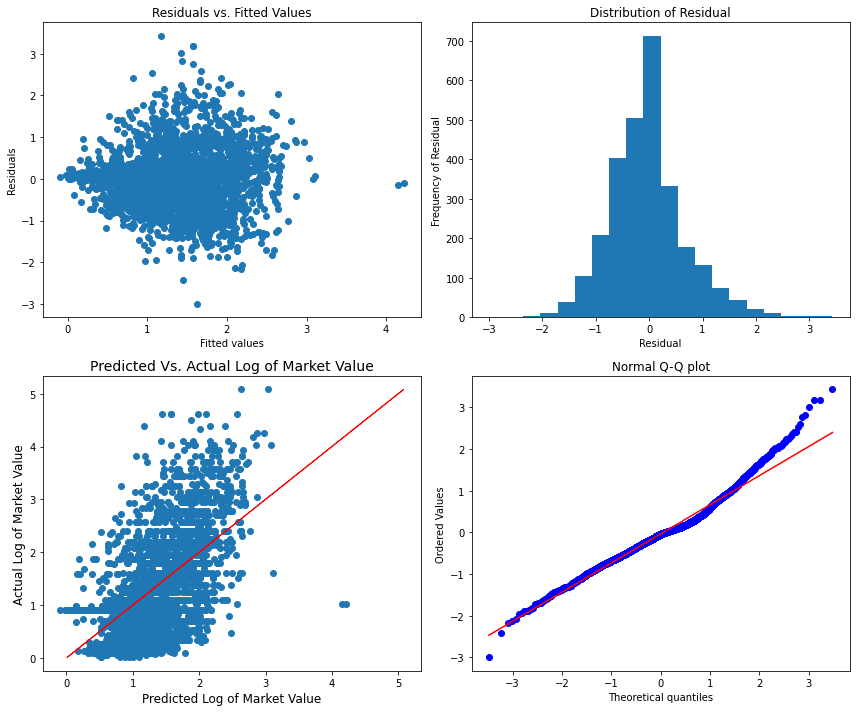

In [226]:
# Find the residuals and predictions
lr_model_3_predict = lr_model_3.predict(X_2_test_scaled)
lr_model_3_resid = y_2_test - RF_model_4_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(lr_model_3_predict, lr_model_3_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(lr_model_3_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(lr_model_3_predict, y_2_test)
plt.plot(y_2_test, y_2_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(lr_model_3_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The R^2 is higher than the baseline model but lower than most of my models. I will now apply a Random Forest on the new data.

**Apply Random Forest Regressor on the new data**

I will apply a Random Forest model on the new data using default hyperparameter to check if there is any improvement.

In [167]:
# Run RandomForest Regressor with default parameter
# Instantiate
RF_model_4 = RandomForestRegressor()
# Fit
RF_model_4.fit(X_2_train_scaled, y_2_train)
# Score
print(f'R^2 on  train set: {round(RF_model_4.score(X_2_train_scaled, y_2_train),2)}')
print(f'R^2 on test test set: {round(RF_model_4.score(X_2_test_scaled, y_2_test),2)}')

R^2 on  train set: 0.92
R^2 on test test set: 0.45


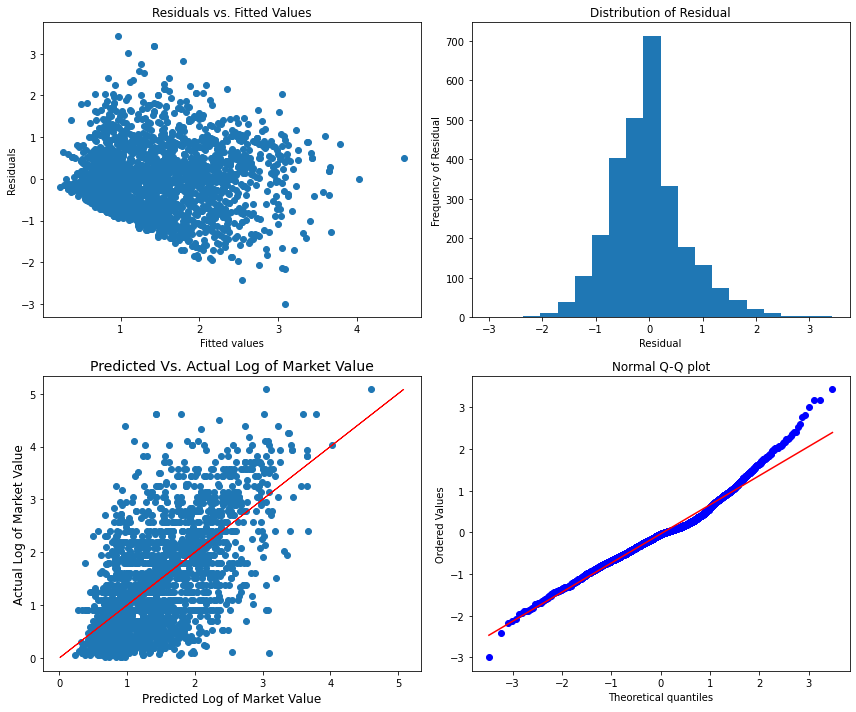

In [170]:
# Find the residuals and predictions
RF_model_4_predict = RF_model_4.predict(X_2_test_scaled)
RF_model_4_resid = y_2_test - RF_model_4_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(RF_model_4_predict, RF_model_4_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(RF_model_4_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(RF_model_4_predict, y_2_test)
plt.plot(y_2_test, y_2_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(RF_model_4_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The R^2 has improved to 45%. There is some overfitting present in the data. The residuals are normal and the predictions look much better.

In [173]:
# Print the MAE
mean_RF_model_4_mae = -np.mean(cross_val_score(RF_model_4, X_2_train_scaled, y_2_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_RF_model_4_mae

0.5327075826607943

In [174]:
# Calculate the RMSE
RF_model_4_cv_train = cross_val_score(RF_model_4, X_2_train_scaled, y_2_train, scoring="neg_root_mean_squared_error",cv=5)
RF_model_4_cv_test = cross_val_score(RF_model_4, X_2_test_scaled, y_2_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
RF_model_4_cv_train_mean = round(-(RF_model_4_cv_train.mean()),2)
# Find the test Results
RF_model_4_cv_test_mean = round(-(RF_model_4_cv_test.mean()),2)

print(f'RMSE on train: {RF_model_4_cv_train_mean}')
print(f'RMSE on test: {RF_model_4_cv_test_mean}')

RMSE on train: 0.72
RMSE on test: 0.72


Both the MAE and RMSE are lower than the previous Random Forest models. This is my best Random Forest model.

**Apply AdaBoost Regressor on the new data**

I will apply an AdaBoost Regressor using the deafult hyperparameter on the new data.

In [175]:
# Run AdaBoost Regressor with default parameter
# Instantiate
AB_model_4 = AdaBoostRegressor()
# Fit model
AB_model_4.fit(X_2_train_scaled, y_2_train)
# Print Score
print(f'R^2 on  train set: {round(AB_model_4.score(X_2_train_scaled, y_2_train),2)}')
print(f'R^2 on test set: {round(AB_model_4.score(X_2_test_scaled, y_2_test),2)}')

R^2 on  train set: 0.29
R^2 on test set: 0.25


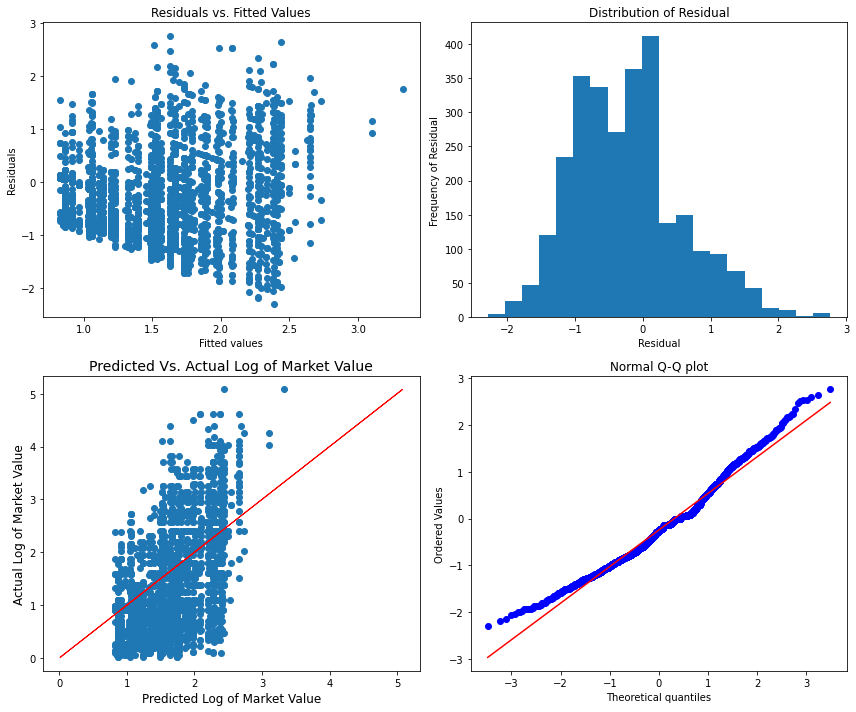

In [230]:
# Find the residuals and predictions
AB_model_4_predict = AB_model_4.predict(X_2_test_scaled)
AB_model_4_resid = y_2_test - AB_model_4_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(AB_model_4_predict, AB_model_4_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(AB_model_4_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(AB_model_4_predict, y_2_test)
plt.plot(y_2_test, y_2_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(AB_model_4_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

There is no improvement in the model performance. I will not explore this further.

**Apply Gradient Boost Regressor on the new data**

I will apply a Gradient Boost model using default hyperparameter on the new data.

In [176]:
# Run Gradient Boosting Regressor with default parameter
# Instantiate
GB_model_4 = GradientBoostingRegressor()
# Fit model
GB_model_4.fit(X_2_train_scaled, y_2_train)
# Print Score
print(f'R^2 on  train set: {round(GB_model_4.score(X_2_train_scaled, y_2_train),2)}')
print(f'R^2 on test set: {round(GB_model_4.score(X_2_test_scaled, y_2_test),2)}')

R^2 on  train set: 0.49
R^2 on test set: 0.42


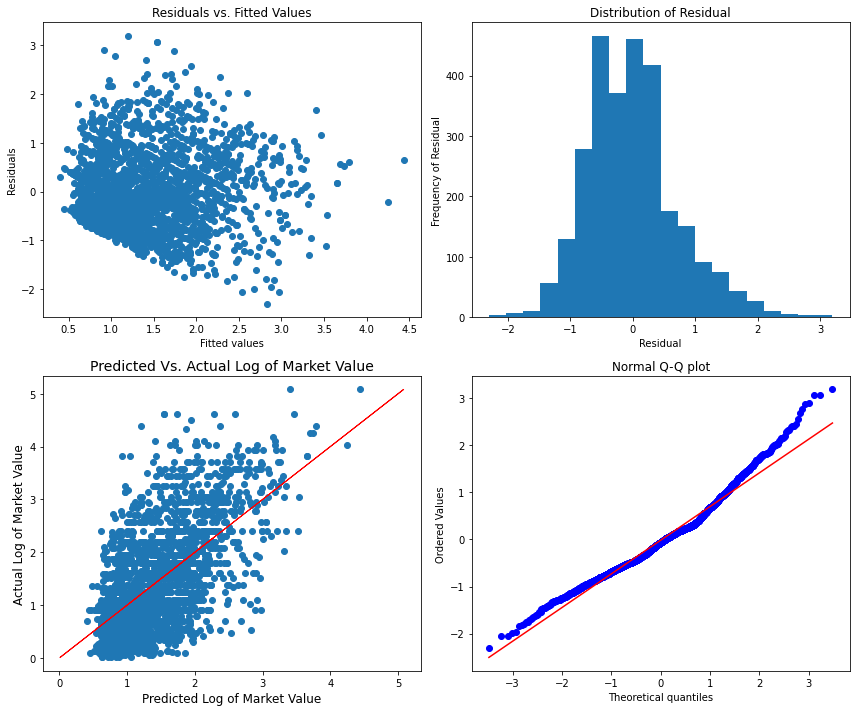

In [229]:
# Find the residuals and predictions
GB_model_4_predict = GB_model_4.predict(X_2_test_scaled)
GB_model_4_resid = y_2_test - GB_model_4_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(GB_model_4_predict, GB_model_4_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(GB_model_4_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(GB_model_4_predict, y_2_test)
plt.plot(y_2_test, y_2_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(GB_model_4_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The Gradient Boost model R^2 did not improve from the previous Gradient Boost model. I will not explore this further.

**Apply XGBoost Regressor on the new data**

I will now apply an XGBoost Regressor using the deafult hyperparameter on the new data.

In [179]:
# Run XGBoost Regressor with default parameter
# Instantiate
XGB_model_4 = XGBRegressor()
# Fit model
XGB_model_4.fit(X_2_train_scaled, y_2_train)
# Print Score
print(f'R^2 on train set: {round(XGB_model_4.score(X_2_train_scaled, y_2_train),2)}')
print(f'R^2 on test set: {round(XGB_model_4.score(X_2_test_scaled, y_2_test),2)}')

R^2 on train set: 0.85
R^2 on test set: 0.45


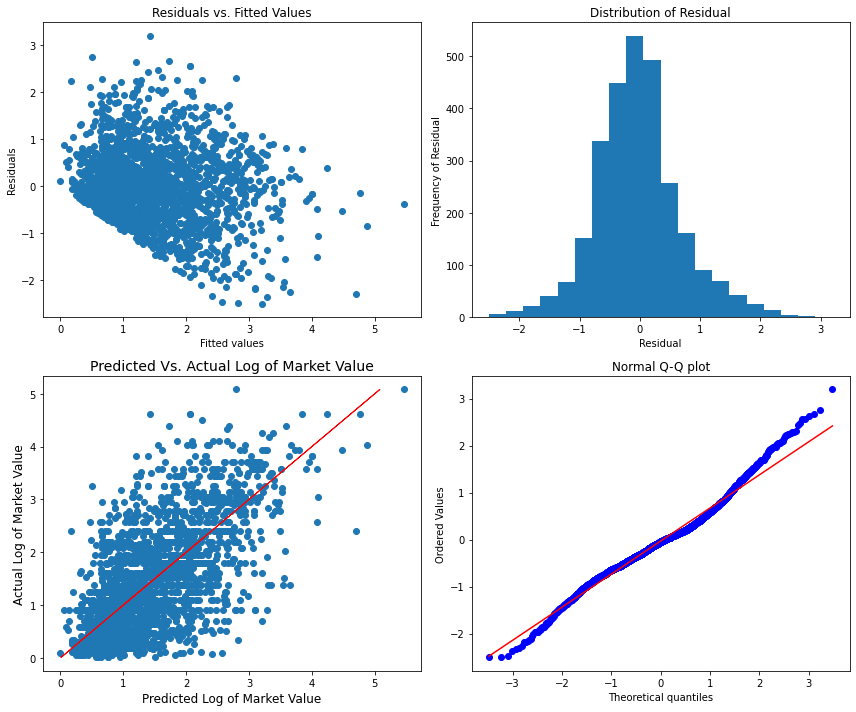

In [232]:
# Find the residuals and predictions
XGB_model_4_predict = XGB_model_4.predict(X_2_test_scaled)
XGB_model_4_resid = y_2_test - XGB_model_4_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(XGB_model_4_predict, XGB_model_4_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(XGB_model_4_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(XGB_model_4_predict, y_2_test)
plt.plot(y_2_test, y_2_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(XGB_model_4_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The R^2 is higher than all of the models. The residuals and predictions look much better. I will run another XGBoost model using the hyperparameter to check for improvement.

In [180]:
# Run XGBoost Regressor with hyperparameter
# Instantiate
XGB_model_5 = XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=1000)
# Fit model
XGB_model_5.fit(X_2_train_scaled, y_2_train)
# Print Score
print(f'R^2 on train set: {round(XGB_model_5.score(X_2_train_scaled, y_2_train),2)}')
print(f'R^2 on test set: {round(XGB_model_5.score(X_2_test_scaled, y_2_test),2)}')

R^2 on train set: 0.96
R^2 on test set: 0.49


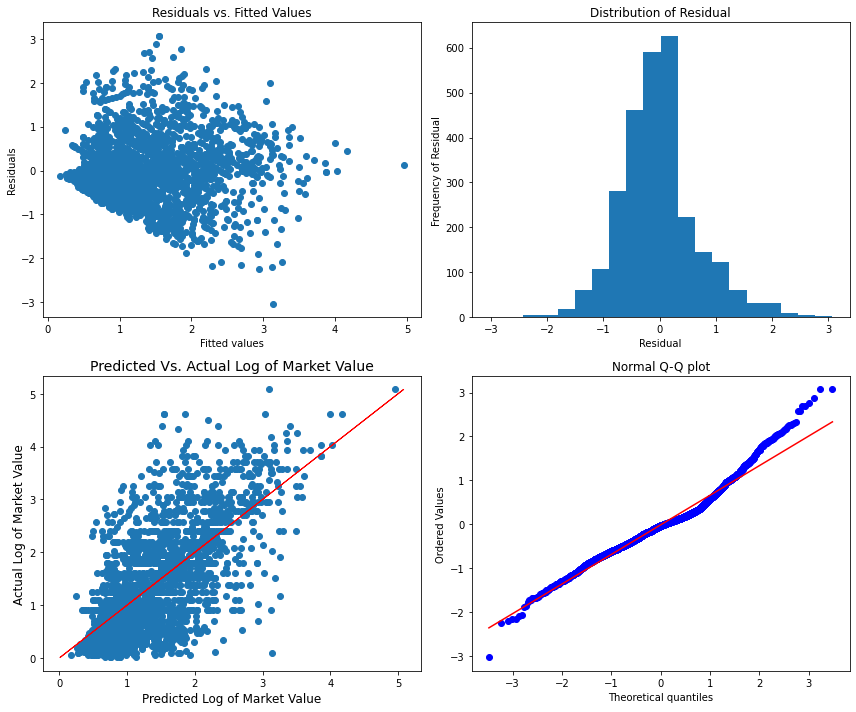

In [184]:
# Find the residuals and predictions
XGB_model_5_predict = XGB_model_5.predict(X_2_test_scaled)
XGB_model_5_resid = y_2_test - XGB_model_5_predict

# Plot the residuals and the predictions
plt.subplots(2,2, figsize=(12, 10))

# plot residuals to check for homoscedasticity
plt.subplot(2,2,1)
plt.scatter(XGB_model_5_predict, XGB_model_5_resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Check residuals for normality
plt.subplot(2,2,2)
plt.hist(XGB_model_5_resid, bins = 20)
plt.xlabel('Residual')
plt.ylabel('Frequency of Residual')
plt.title('Distribution of Residual')

# Visulaize Predicted vs. Actual log of Market Value
plt.subplot(2,2,3)
plt.scatter(XGB_model_5_predict, y_2_test)
plt.plot(y_2_test, y_2_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)

# Plot a normal Q-Q plot
plt.subplot(2,2,4)
stats.probplot(XGB_model_5_resid, dist="norm", plot=plt);
plt.title("Normal Q-Q plot")

plt.tight_layout()
plt.show()

The R^2 has improved by 4%. This is the highest R^2 I have so far. The residuals are normally distributed and the Q-Q plot is also linear. The model is making better predictions than before. I will check the MAE and RMSE to calculate the average absolute errors between the true value and predicted value.

In [185]:
# Print the MAE
mean_XGB_model_5_mae = -np.mean(cross_val_score(XGB_model_5, X_2_train_scaled, y_2_train, 
                                                          cv=5, scoring='neg_mean_absolute_error'))
# Display the result
mean_XGB_model_5_mae

0.515444260751378

In [186]:
# Calculate the RMSE
XGB_model_5_cv_train = cross_val_score(XGB_model_5, X_2_train_scaled, y_2_train, scoring="neg_root_mean_squared_error",cv=5)
XGB_model_5_cv_test = cross_val_score(XGB_model_5, X_2_test_scaled, y_2_test, scoring="neg_root_mean_squared_error",cv=5)

# Find the train Results
XGB_model_5_cv_train_mean = round(-(XGB_model_5_cv_train.mean()),2)
# Find the test Results
XGB_model_5_cv_test_mean = round(-(XGB_model_5_cv_test.mean()),2)

print(f'RMSE on train: {XGB_model_5_cv_train_mean}')
print(f'RMSE on test: {XGB_model_5_cv_test_mean}')

RMSE on train: 0.71
RMSE on test: 0.73


Both the MAE and RMSE are the lowest comapred to all the models I have used so far. This is the best model I have so far. 

-------

## Findings

I will find the key predictors in determining the Market value from the SVR model-5 with the help of feature importances.

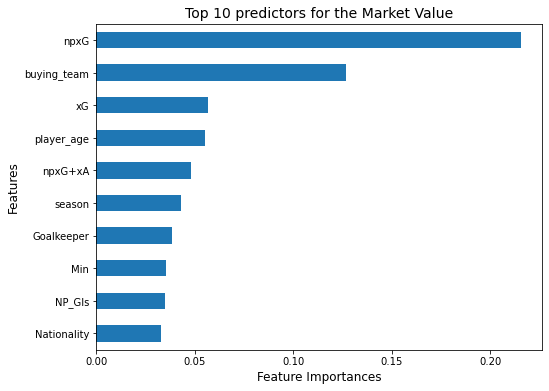

In [181]:
# Visualize the top 10 features
fig,ax = plt.subplots(figsize=(8,6))
plt.title('Top 10 predictors for the Market Value', fontsize=14)
plt.xlabel('Feature Importances', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Extract the top 10 features
feat_importances = pd.Series(XGB_model_5.feature_importances_, index = X_2_train.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')

plt.show()

Player potential performance statistics like non-penalty expected goals, expected goals and performance statistics like the minutes played, non-penalty goals play a crucial role in determining the Market value of a player. The `buying_team` has almost twice the effect on the Market Value than other features in the dataset. This makes sense  The teams or clubs play a major role in determning the Market Value of a Footballer. If a player is playing for a big club like Real Madrid, Manchester United or Liverpool then the value of that player increases as the clubs add a certain degree of brand value to the players. The more games a player takes part in, the more value it adds to him, and the more he can prove himself infront of the world so minutes played by a player make a difference as well unlike players who are benchwarmers and also participate in a game when another player is unable to play. The Market Value of these players are certainly less. `season` is also a key predictor for Market Value. This makes sense since with the increasing years, we are losing the monetary value and also we need to consider inflation. `Nationality` which is one of my featured engineered feature, also is one of the predictors. That means Europeans have a higher Market Value than other nationalities.

I will look at the model predictions now and will also visualize the model predictions without the log value.

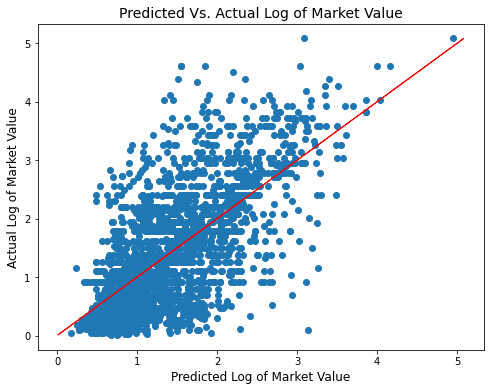

In [187]:
# Visulaize Predicted vs. Actual log of Market Value
plt.figure(figsize=(8,6))

plt.scatter(XGB_model_5_predict, y_2_test)
plt.plot(y_2_test, y_2_test, color='red',linewidth=1)
plt.title('Predicted Vs. Actual Log of Market Value', fontsize=14)
plt.xlabel('Predicted Log of Market Value', fontsize=12)
plt.ylabel('Actual Log of Market Value', fontsize=12)
plt.show()

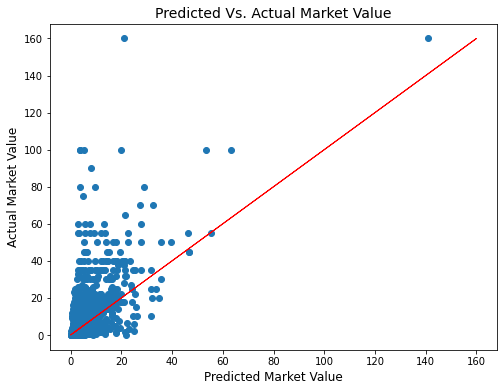

In [188]:
# Visulaize Predicted vs. Actual Market Value
plt.figure(figsize=(8,6))

plt.scatter(np.expm1(XGB_model_5_predict), np.expm1(y_2_test))
plt.plot(np.expm1(y_2_test), np.expm1(y_2_test), color='red',linewidth=1)
plt.title('Predicted Vs. Actual Market Value', fontsize=14)
plt.xlabel('Predicted Market Value', fontsize=12)
plt.ylabel('Actual Market Value', fontsize=12)

plt.show()

When I “un-log” the predicted target variable and compare it with the original market value I can see that the predictions are not that good. 

Moreover, the Mean Absolute Error increases to 0.67 millions. The results are surprising, however I should highlight that this is the best model I could possibly achieve with the limited features that I chose. I will create dataframe to compare all of my model performance.

In [195]:
# Create a comparison dataframe with all the R^2, MAE and RMSE
comparison_df = pd.DataFrame(columns=['Model','R^2', 'MAE', 'RMSE'])
a=1

rf_r2 = round(RF_model_4.score(X_2_test_scaled, y_2_test),2)
rf_mae = round(np.expm1(mean_RF_model_4_mae),2)
rf_rmse = round(np.expm1(RF_model_4_cv_test_mean),2) 

ab_r2 = round(AB_model_1.score(X_orig_test_scaled, y_orig_log_test),2)
ab_mae = round(np.expm1(mean_AB_model_1_mae),2)
ab_rmse = round(np.expm1(AB_model_1_cv_test_mean),2)

gb_r2 = round(GB_model.score(X_orig_test_scaled, y_orig_log_test),2)
gb_mae = round(np.expm1(mean_GB_model_mae),2)
gb_rmse = round(np.expm1(GB_model_cv_test_mean),2)

xgb_r2 = round(XGB_model_5.score(X_2_test_scaled, y_2_test),2)
xgb_mae = round(np.expm1(mean_XGB_model_5_mae),2)
xgb_rmse = round(np.expm1(XGB_model_5_cv_test_mean),2)

# Display the results in the dataframe
if a == 1: 
    comparison_df.loc[0] = ['Linear Regression', 0.33, 0.86, 1.20]
    comparison_df.loc[1] = ['Lasso', 0.33, 0.86, 1.20]
    comparison_df.loc[2] = ['Ridge', 0.33, 0.86, 1.20]
    comparison_df.loc[3] = ['KNN Regressor', 0.40, 0.72, 1.16]
    comparison_df.loc[4] = ['DT Regressor', 0.33, 0.83, 1.25]
    comparison_df.loc[5] = ['SVR', 0.41, 0.73, 1.12]    
    comparison_df.loc[6] = ['Random Forest', rf_r2, rf_mae, rf_rmse]
    comparison_df.loc[7] = ['AdaBoost', ab_r2, ab_mae, ab_rmse]
    comparison_df.loc[8] = ['Gradient Boost', gb_r2, gb_mae, gb_rmse]
    comparison_df.loc[9] = ['XGBoost', xgb_r2, xgb_mae, xgb_rmse]
    
    
    a+=1
    
# Display the results
comparison_df

Model   R^2   MAE  RMSE
0  Linear Regression  0.33  0.86  1.20
1              Lasso  0.33  0.86  1.20
2              Ridge  0.33  0.86  1.20
3      KNN Regressor  0.40  0.72  1.16
4       DT Regressor  0.33  0.83  1.25
5                SVR  0.41  0.73  1.12
6      Random Forest  0.45  0.70  1.05
7           AdaBoost  0.31  0.86  1.18
8     Gradient Boost  0.43  0.75  1.08
9            XGBoost  0.49  0.67  1.08

I will also create another dataframe for my baseline model.

In [196]:
# Create a comparison dataframe with all the R^2, MAE and RMSE
baseline_df = pd.DataFrame(columns=['Baseline','R^2', 'MAE', 'RMSE'])
a=1
# Display the results in the dataframe
if a == 1: 
    baseline_df.loc[0] = ['Baseline Model', baseline_r2, round(baseline_model_mae,2), baseline_cv_test_mean]
    
    a+=1
    
# Display the results
baseline_df

Baseline  R^2   MAE   RMSE
0  Baseline Model  0.2  5.86  10.12

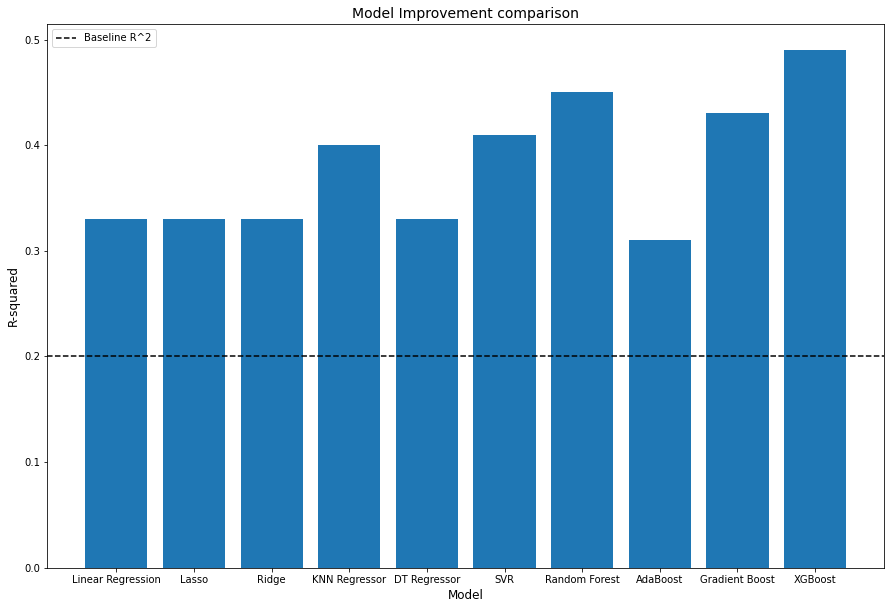

In [239]:
# visualizing the comparison of R^2 between each models
plt.figure(figsize=(15, 10))

plt.bar(comparison_df['Model'], comparison_df['R^2'])
plt.axhline(y=0.20, linestyle = 'dashed', color='black', label='Baseline R^2')
plt.title('Model Improvement comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.legend(loc='upper left')

plt.show()

Looking at the R<sup>2</sup> of all the models I can see that the XGBoost Regressor has the highest R<sup>2</sup> compared to the other models followed by Random Forest and Gradient Boost Regressor. I will now compare the MAE and RMSE of all the models.

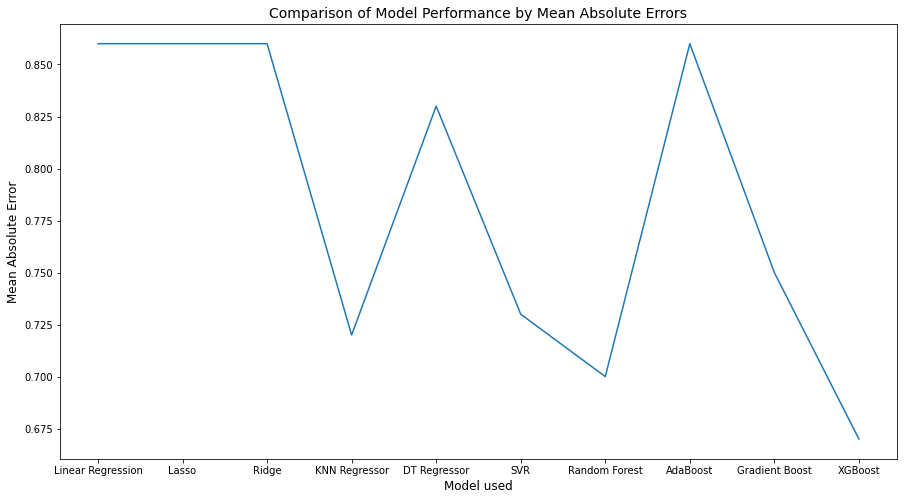

In [237]:
# visualizing the comparison of R^2 between each models
plt.figure(figsize=(15, 8))

plt.plot(comparison_df['Model'], comparison_df['MAE'])
plt.title('Comparison of Model Performance by Mean Absolute Errors', fontsize=14)
plt.xlabel('Model used', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)

plt.show()

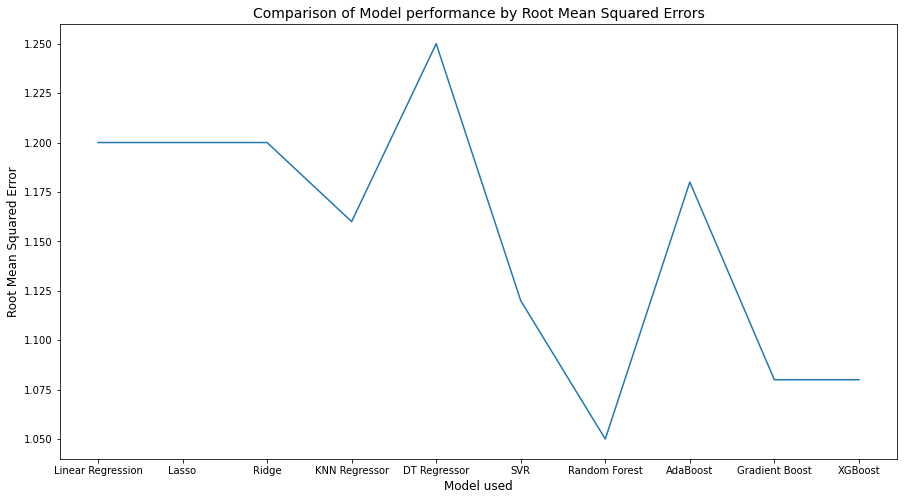

In [238]:
# visualizing the comparison of R^2 between each models
plt.figure(figsize=(15, 8))

plt.plot(comparison_df['Model'], comparison_df['RMSE'])
plt.title('Comparison of Model performance by Root Mean Squared Errors', fontsize=14)
plt.xlabel('Model used', fontsize=12)
plt.ylabel('Root Mean Squared Error', fontsize=12)

plt.show()

The XGBoost again has the lowest MAE of 0.67 million and 1.08 million of RMSE. Therefore the XGBoost is my best model that has the most accurate predictions of the Market value compared to all the models I have used.

------

## Conclusion

10 models have been used in this project to predict the player transfer market value. For model evaluation, **R<sup>2</sup>** metrics has been used as a measure of goodness of fit to measure the model accuracy and the **Mean Absolute Errors** has been calculated for each model to find the average absolute errors between the true market value and the predicted market values to measure the model performance. Additionally, the **Root Mean Squared Errors** has also been calculated as a scoring metrics. The results for each model has been compared to identify which model worked best to predict player Market Values with the highest R<sup>2</sup> and the lowest Mean Absolute Errors and Root Mean Squared Error.

Among all the models, the XGBoost Regressor had the best accuracy and performance with the highest R<sup>2</sup> and lowest MAE and RMSE. The model had an error of around 0.67 million EUR with the model able to predict the Market Value best. Therefore, this model is good for predicting the Market Value of elite players who tend to have a higher Market value. 

I also found out the key predictors that determines the Player Market Value. The features that had the most positive
effect are **season/year** the Market Value was recorded, **current team** and **Nationality** the player belongs to. This is because the teams add a certain degree of brand value to the players and Europeans tend to have a higher market value than other nationalities. Player on-field performance like the **number of matches played**, **non-penalty goals**, **penalty kicks made** and player potential performance statistics like **non-penalty expected goals**, **expected assists** and **expected goals** had a strong positive effect on the market value. 

Features that had the most negative effect include **player age**, **number of yellow cards** and **red cards received**. As the player gets older, their stamina decreases, their performance deteriorates and since they can't perform well the demand to have them play in a club decreases along with their Market Value. A higher number of red and yellow cards could imply a disciplinary issue of the player character.

## Drawbacks and Next Steps

There were some limitations to this project. First, I had data for only a limited number of players as I only used the players from 5 leagues. Secondly, I only had a limited number of features as my independent variables. Also my model is good for predicting the Market value of elite players who have a higher Market value. Moreover, based on my findings, I believe that to accurately predict a player market value, only their on-field performance data may not be enough. According to the Transfermarkt website, they use information on the player’s skill, potential, recent performance, injury record, contract duration, position and others to estimate an accurate transfer fee. Factors like media image, social media coverage and what is called the “superstar status” or popularity of the player play a crucial role in determining the Market value. Players like Neymar Jr. and Cristiano Ronaldo have a big media presence and can attract more sponsorship deals than others. Therefore, a player’s image outside of the Football world and their crowd-pulling power have a huge impact on the market value. 

For my next steps, I would like to go deeper and include more features like contract length of the player, media coefficient and increase the number of players by taking data for all leagues.

--------